- author: Lee Meng
- date: 2020-01-06 01:00
- title: 世上最生動的 PCA：直觀理解並應用主成分分析
- slug: essence-of-principal-component-analysis
- tags: PCA, 主成分分析, 機器學習, 線性代數, Python
- description: 這篇文章用世上最生動且實務的方式帶你直觀理解機器學習領域中十分知名且強大的線性降維技巧：主成分分析 PCA。我們將重新回顧你所學過的重要線性代數概念，並實際應用這些概念將數據有效地降維並去除特徵間的關聯。你也將學會如何使用 NumPy 和 scikit-learn 等 Python 函式庫自己實作 PCA。文中也分享使用 PCA 分析線上遊戲《英雄聯盟》公開數據的有趣案例。
- summary: 這篇文章用世上最生動且實務的方式帶你直觀理解機器學習領域中十分知名且強大的線性降維技巧：主成分分析 PCA。我們將重新回顧你所學過的重要線性代數概念，並實際應用這些概念將數據有效地降維並去除特徵間的關聯。你也將學會如何使用 NumPy 和 scikit-learn 等 Python 函式庫自己實作 PCA。文中也分享使用 PCA 分析線上遊戲《英雄聯盟》公開數據的有趣案例。
- image: pca-league-of-legend-champions.jpg


!quote
- 在這個萬物皆向量的時代，能夠了解事物本質的數據處理能力變得前所未有地重要。

[主成分分析（**P**rincipal **C**omponent **A**nalysis, 後簡稱為 PCA）](https://zh.wikipedia.org/wiki/%E4%B8%BB%E6%88%90%E5%88%86%E5%88%86%E6%9E%90)在 100 年前由英國數學家[卡爾·皮爾森](https://zh.wikipedia.org/wiki/%E5%8D%A1%E5%B0%94%C2%B7%E7%9A%AE%E5%B0%94%E9%80%8A)發明，是一個至今仍在機器學習與統計學領域中被廣泛用來[分析資料、降低數據維度以及去關聯](https://zh.wikipedia.org/wiki/%E9%99%8D%E7%BB%B4)的**線性降維**方法。

因為其歷史悠久且相較其他降維手法簡單，網路上已有不少優質的[機器學習課程](https://youtu.be/iwh5o_M4BNU)以及[部落格](https://notsquirrel.com/pca/)探討其概念。在這篇文章裡，我則將透過 [Manim](https://github.com/3b1b/manim) 動畫、[NumPy](https://numpy.org/) 以及 [scikit-learn](https://scikit-learn.org/stable/index.html)，跟你一起用這世上最直觀的角度重新體會 PCA 之美以及其背後關鍵的[線性代數（Linear Algrbra）](https://zh.wikipedia.org/wiki/%E7%BA%BF%E6%80%A7%E4%BB%A3%E6%95%B0)與[統計（Statistic）](https://zh.wikipedia.org/zh-hant/%E7%BB%9F%E8%AE%A1%E5%AD%A6)精神。


!mp4
- images/pca/covariance-matrix-as-linear-transformation.mp4
- 我們後面會看到將共變異數矩陣 $\mathbf{K}$ 視為一線性轉換並套用到數據 $\mathbf{X}$ 上會增強其變異趨勢

閱讀完本文，我相信你將能夠：
- 直觀且正確地理解 PCA 並欣賞其背後美麗的數學概念
- 了解如何運用 PCA 分析個人遇到的問題或是企業數據
- 具備能夠深入了解相關機器學習領域的基礎

希望你跟我一樣迫不及待地想要開始了！在正式踏上這趟旅途之前，我想說明一下你需要事先預習（或複習）的知識。另外因為本文內的動畫皆為黑底，我強烈推薦點擊左下按鈕以暗色模式繼續閱讀。



## 一些你需先具備的基礎知識

!quote
- 鑽研學問的這條道路之上，就連帝王也沒有捷徑可循。

如同以往文章，為了讓美麗的知識能夠散播到最遠的地方，我會盡可能地平鋪直述 PCA，以期能讓閱讀門檻被降到最低。我會用不少動畫帶你直觀理解 PCA 的本質，而不只是丟個公式給你，或是教你怎麼用機器學習函式庫的 API。

話雖這麼說，你仍需具備高中或大一程度的線性代數基礎。如果你**完全沒有**修過任何線代課程，我會強烈建議你先去觀看 [3Blue1Brown 的線性代數本質](https://www.youtube.com/playlist?list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab)。這是世上最好的線代入門教學，能讓你對以下概念有最直觀的理解：
- [線性組合 Linear Combination](https://www.youtube.com/watch?v=k7RM-ot2NWY&list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab&index=3&t=0s)
- [線性轉換 Linear Transformation](https://www.youtube.com/watch?v=kYB8IZa5AuE&list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab&index=4&t=0s)
- [點積 Dot Product](https://www.youtube.com/watch?v=LyGKycYT2v0&list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab&index=10&t=0s)
- [基底變更 Change of Basis](https://www.youtube.com/watch?v=P2LTAUO1TdA&list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab&index=14&t=1s)
- [特徵向量/值 Eigenvectors 與 Eigenvalues](https://www.youtube.com/watch?v=PFDu9oVAE-g&list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab&index=15&t=0s)

本文則可以幫助你把基礎的線代知識無縫接軌地與 PCA 連結，並學會如何將 PCA 運用在真實世界的數據。如果你要更扎實、更正式的線性代數基礎課程，我會大力推薦 [MathTheBeautiful](https://www.youtube.com/watch?v=Fnfh8jNqBlg&list=PLlXfTHzgMRUKXD88IdzS14F4NxAZudSmv) 以及 [Mathematics For Machine Learning](https://github.com/mml-book/mml-book.github.io)。


!quote
- 一個好的教學者會引導你去找到最好的學習資源。


我的上一篇文章，[給所有人的深度學習入門：直觀理解神經網路與線性代數](https://leemeng.tw/deep-learning-for-everyone-understand-neural-net-and-linear-algebra.html)也用了大量動畫說明矩陣相乘（Matrix Multiplication）、線性轉換以及神經網路（
Neural Network）
與線代之間的緊密關係，建議事先閱讀。本文會聚焦在 PCA 身上。未來有時間的話，我會撰文說明 PCA 跟[深度學習](https://leemeng.tw/deep-learning-resources.html)領域中的 [Autoencoder](https://youtu.be/PSOt7u8u23w) 之間的美妙對應關係。想要先睹為快的讀者稍後可以觀看台大電機李宏毅教授的 [PCA 課程](https://www.youtube.com/watch?v=iwh5o_M4BNU)以及圖靈獎得主 Geoffrey Hinton 的 [From PCA to autoencoders](https://www.youtube.com/watch?v=PSOt7u8u23w&t=48s)。



!mp4
- images/manim/00010.mp4
- 《給所有人的深度學習入門》一文展示了神經網路解決二元分類的過程

我接著會假設你已將[上篇文章](https://leemeng.tw/deep-learning-for-everyone-understand-neural-net-and-linear-algebra.html)以及 3Blue1Brown 的[影片](https://www.youtube.com/playlist?list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab)看過一遍，或是至少已了解剛剛提到的幾個基本線代概念。當然，我懂你想要「省時間」直接閱讀的心情，而你也完全可以這樣做！不過如果你等等發現自己的線代基礎不是那麼穩固，我會建議回到本節打好底子，或是點擊我在當下附的連結複習相關概念。另外，如果你只是被文章封面吸引過來，想要馬上看到用 PCA 分析線上遊戲[《英雄聯盟》](https://lol.garena.tw/game/champion)的案例，可以先跳到[踏入荒野：實際應用 PCA 來解析真實數據](#踏入荒野：實際應用-PCA-來解析真實數據)一節。


萬丈高樓平地起，打好地基真的很重要。但現在假設你已經準備完畢，讓我們開始這趟 PCA 的深度探索之旅吧！

## 世上最簡單的降維：給我一個數字就好！


我們前面提到 PCA 可以用來有效地降低數據維度。跟[上篇文章討論過的二元分類](https://leemeng.tw/deep-learning-for-everyone-understand-neural-net-and-linear-algebra.html)不同，[降維（Dimensionality Reduction）](https://en.wikipedia.org/wiki/Dimensionality_reduction)是一種[無監督學習](https://en.wikipedia.org/wiki/Unsupervised_learning)，其最主要的目的是「化繁為簡」：將原本**高維**的數據（比方說 $N$ 維）重新以一個**相較低維**的形式表達（比方說 $K$ 維，且 $K < N$）。理想上只要該 $K$ 維的表徵（representation）具有代表性，能夠抓住原來 $N$ 維數據的大部分特性，我們就能在沒有損失什麼資訊的情況下，用更簡潔的方式呈現該組數據，進而對其本質有更深的理解。


!quote
- 數學的本質不是將簡單的事情變複雜，而是將複雜的事物簡化。
- Stan Gudder


現在想像你這幾天都在重複進行一項複雜的實驗，好不容易取得了 20 個有效樣本（samples）。你將這些觀測值（observations）以一個[矩陣（matrix）](https://zh.wikipedia.org/zh-hant/%E7%9F%A9%E9%98%B5)的形式存了下來。該數據矩陣 $X$ 裡頭的每一行（column）代表著一個特定樣本，而每一列（row）則代表著一個特定[特徵（**f**eature）](https://en.wikipedia.org/wiki/Feature_(machine_learning) $f$ 的觀測結果：


In [ ]:
"""
為了教學目的，使用 NumPy 隨機初始化一些 demo 用的數據
現在你只需要關注最後生成的矩陣 `X` 即可（下一節我們會討論其他細節）
"""
import numpy as np
from numpy.testing import assert_almost_equal

# 顯示小數點下兩位，保持畫面簡潔
np.set_printoptions(precision=2)

# reproductivity, 讓你可以跟著重現此 demo 數據
# 我也鼓勵你實際執行範例程式碼以內化本文概念
rng = np.random.RandomState(1)
 
# 初始化實驗數據並減去平均（文後會說明為何要減去平均）
W = rng.rand(2, 2)
X_normal = rng.normal(scale=5, size=(2, 20))
X_orig = W @ X_normal  # @ 就是你學過的矩陣相乘運算
X_mean = X_orig.mean(axis=1)[:, np.newaxis]
X = X_orig - X_mean
mean = X.mean(axis=1)

# 測試 numerical 相等，確保樣本的平均已經為 0
# 這類數值測試在你需要自己實作 ML 演算法時十分重要
assert_almost_equal(0, mean)

print('X.shape:', X.shape, '\n')
print(X)


X.shape: (2, 20) 

[[ 2.89  0.32  5.8  -6.52  3.94 -4.21  0.45  2.14  1.3  -4.98 -2.4  -3.1
   0.69 -1.59 -3.64 -0.24  6.81  4.63 -2.24 -0.06]
 [ 1.52  0.91  1.52 -0.88 -0.03 -1.26 -0.25  0.96 -0.89 -0.45 -0.88 -1.12
  -0.86  0.13 -1.53  0.51  2.66  1.28 -0.14 -1.19]]


注意在這個例子裡，我們是怎麼解讀數據矩陣 $\mathbf{X}$ 的：
- $\mathbf{X}$ 維度為 `(n_features, n_samples)`
- 每一行（column）代表著一個特定的樣本 $x$
- 每一列（row）則代表某特徵 $f$ 的所有觀測值


在矩陣 $\mathbf{X}$ 中，每個樣本 $x$ 都是一個 2 維的行向量（column vector）。要取得第一個樣本 $x_{1}$：

In [ ]:
"""
每個樣本為一個 column vector，索引從 0 開始
第一個 「 : 」 代表取得所有對應的 rows
"""
X[:, 0]

array([2.89, 1.52])

除了 [NumPy](https://numpy.org/) 比較特別以外，有實際用過 [scikit-learn](https://scikit-learn.org/stable/)、[PyTorch](https://pytorch.org/) 或是 [TensorFlow](https://www.tensorflow.org/) 做過矩陣運算的讀者們應該都清楚，實作上這些函式庫常會將數據矩陣 $X$ 做[轉置（transpose）](https://en.wikipedia.org/wiki/Transpose)，使其維度變成 `(n_samples, n_features)`。這樣的好處是每一個列向量（row vector）都直接對應到一個樣本。這使得我們可以更輕鬆地存取特定樣本：

In [ ]:
"""
跟上例一樣取出第一個樣本。
因第一維度為 n_samples ，只需要一維索引即可
"""
# sanity check
assert_almost_equal(X[:, 0], X.T[0])
X.T[0]

array([2.89, 1.52])

但缺點就是所有對 $\mathbf{X}$ 做的轉換也都得跟著轉置，導致有些本來很簡單的線性轉換變得不那麼地直覺：

$$
\begin{align}
\mathbf{ABCX} \rightarrow (\mathbf{ABCX})^\top  \rightarrow \mathbf{X^\top C^\top B^\top A^\top}
\end{align}
$$


因此雖然多數 Python 函式庫實作上會先轉置數據 $\mathbf{X}$ 再對其進行矩陣運算，為了與一般線性代數文獻中的慣例一致，本文皆以**行向量**（column vector）來表示每個樣本 $x$。事實上，你可以把行向量想像成是一個 $m\times 1$ 的矩陣：

$$
\begin{align}
x = \begin{bmatrix}
a_{11}\\ 
a_{21}\\
...\\
a_{m1}
\end{bmatrix}, a_{i1} \in R
\end{align}
$$

本文前半皆以 $m=2$ 作為例子。這樣表達 $x$ 的好處是你不需把以前學過的矩陣相乘再做一次轉置。等內化本文概念以後，你自然可以輕鬆地切換數據 $X$ 與其轉置 。為了幫助你進入狀況，底下展示如何取得數據 $\mathbf{X}$ 裡一或多個特定樣本 $x$：





!mp4
- images/pca/IndexingDataMatrixScene.mp4

是的，在[資料分析](https://leemeng.tw/practical-pandas-tutorial-for-aspiring-data-scientists.html)以及機器學習領域裡矩陣索引（indexing）十分基本，基本到你可能沒想過竟然會有人特地為此做動畫。不過我想現在不論背景，你應該都可以在腦中想像如何操作數據 $\mathbf{X}$ 並取得特定的樣本了。這很重要，所以你得讓它變成直覺反應。在[淺談神經機器翻譯](https://leemeng.tw/neural-machine-translation-with-transformer-and-tensorflow2.html)裡，我們也運用相同的索引方式存取高達 4 維的批次（batch）詞向量數據。

所見即所得，我們可以再次確認同樣的索引可以得到跟動畫中相同的內容：

In [ ]:
X[:, :6]

array([[ 2.89,  0.32,  5.8 , -6.52,  3.94, -4.21],
       [ 1.52,  0.91,  1.52, -0.88, -0.03, -1.26]])

了解如何操作 $\mathbf{X}$ 後，讓我們再次回到降維的話題。

現在想像你興沖沖地跑去見指導教授，迫不及待地獻上你剛搜集到的熱騰騰數據 $\mathbf{X}$。教授僅看了一眼便道：



!quote
- **兩個**特徵有點多，你能不能想辦法只用**一個**特徵來表示這些樣本的**特性**？

你連忙點頭稱是，接著便離開教授的辦公室。回到螢幕前，你盯著 $\mathbf{X}$ 裡頭的這些數字 #越想越不對勁。到底要怎樣才能把這些 2 維向量 $x$ 各自用**一個**新的數值表示，同時又能保持這些樣本的**特性**不變呢？

我們都是視覺動物。你可能會想嘗試視覺化（visualize）手中這些數據，看看是否有什麼顯而易見的幾何線索。

那要怎麼視覺化數據 $\mathbf{X}$ 呢？在觀察到這些樣本只有**兩個**特徵值以後，我想絕大多數人的第一個念頭都是：選擇**一個**最為熟悉、地位崇高的[笛卡爾座標系統(Cartesian coordinate system)](https://zh.wikipedia.org/wiki/%E7%AC%9B%E5%8D%A1%E5%B0%94%E5%9D%90%E6%A0%87%E7%B3%BB)，接著將每個樣本 $x_i$ 裡頭的第一特徵 $f_1$ 與第二特徵 $f_2$ 分別視為此系統裡的 x 與 y 座標，描繪其對應的幾何向量 $\vec{x_i}$：

!mp4
- images/pca/PlotDataOnCartesianBasisScene.mp4
- options: controls

沒錯，僅僅是將看似毫無章法的數據 $\mathbf{X}$ 描繪在這個座標系統上面，我們就能透過與生俱來的幾何直覺預測兩特徵 $f_1$ 與 $f_2$ 之間存在著某種程度的[線性關係](https://zh.wikipedia.org/zh-hant/%E7%B7%9A%E6%80%A7%E9%97%9C%E4%BF%82)。這是幾何觀點上的一大勝利。這個發現讓我們離降維的目標近了許多。

但熟悉 [Matplotlib](https://matplotlib.org/) 的讀者應該都明白，我只需用兩行程式碼就可以畫出 $\mathbf{X}$，根本不用花那麼多時間製作這個動畫：

```python
import matplotlib.pyplot as plt
plt.scatter(X[0], X[1])
```


你是對的。會花那麼多工夫是因為事實上我最想傳達的訊息是：


!quote
- 重新學習你認為自己已經學會的知識。你將發現自己能獲得更多。


因為我最想要你關注的並不是 $\mathbf{X}$ 的分布，也不是最後幾秒那條顯而易見的斜線。我要你看的是最初一秒構成這個座標系統的兩個[基底向量](https://bit.ly/2QmzPnj) $\hat{i}$、$\hat{j}$。最關鍵的是理解每個樣本的 $(x, y)$ 座標是怎麼被生成的。首先動畫裡選擇了一組你習以為常的 $\Re^2$ 基底：

$$
\begin{align}
\hat{i} = \begin{bmatrix} 1\\0 \end{bmatrix}, \hat{j} = \begin{bmatrix} 0\\1 \end{bmatrix}, \Re^2 = span[\hat{i}, \hat{j}]
\end{align}
$$

接著在**給定這組基底的前提**下，我們一步步找出前 4 個樣本對應的 $(x, y)$ 座標。換句話說，將每個樣本 $\vec{x}$ 表達成這組基底的[線性組合（Linear Combination）](https://www.youtube.com/watch?v=k7RM-ot2NWY&list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab&index=3&t=0s)。每個樣本的 $(x, y)$ 座標是這樣被找到的：

$$
\begin{align}
\vec{x} &= \begin{bmatrix} f_1\\f_2 \end{bmatrix}\\
  & = x \begin{bmatrix} 1\\0 \end{bmatrix} + y \begin{bmatrix} 0\\1 \end{bmatrix}, x, y \in \Re\\
  & = f_1 \begin{bmatrix} 1\\0 \end{bmatrix} + f_2 \begin{bmatrix} 0\\1 \end{bmatrix}\\
  & = f_1 * \hat{i} + f_2 * \hat{j}
\end{align}
$$



在線性代數的世界裡，我們常會把基底向量 $\{\vec{i}, \vec{j}\}$ 稱作標準基底 $\mathbf{B}_{standard}$，而剛剛動畫裡出現的那些 $(x, y)$ 座標則是該基底的其成分表徵（Component Representation）。你可以把 $\{\vec{i}, \vec{j}\}$ 當成是 2 維[向量空間（Vector Space）](http://linear.ups.edu/html/section-VS.html)裡頭的基礎成分（Component）並將所有處在該空間裡的樣本 $\vec{x}$ 表示成這 2 個成分的線性組合。因此要為數據 $\mathbf{X}$ 取得一組成分表徵並將其繪製在對應的座標系統上，事實上你得先選擇一個[基底（Basis）](https://bit.ly/2QmzPnj)。


以上例而言， $\mathbf{X}$ 的成分表徵之所以那麼好找，好找到你根本不覺得你有選擇 $\mathbf{B}_{standard}$，是因為它太符合直覺了！如果你把其中一個基底向量換掉，找出來的 $(x, y)$ 座標就不再是 $(f_1, f_2)$ 。你可以試試用下面這組基底 $\mathbf{B}_{pc}$ 來建構 $\mathbf{X}$ 的 $(x, y)$ 座標：



$$
\begin{align}
\vec{b_1} = \begin{bmatrix} 0.97\\0.25 \end{bmatrix}, \vec{b_2} = \begin{bmatrix} -0.25\\0.97 \end{bmatrix}\\
\Re^2 = span[\vec{b_1}, \vec{b_2}]
\end{align}
$$

$\vec{b_1}$ 與 $\vec{b_2}$ 因為彼此[線性獨立（Linearly Independent）](https://en.wikipedia.org/wiki/Linear_independence)且可以 [span](https://en.wikipedia.org/wiki/Linear_span) 出 $\Re^2$ ，是個合法的基底。但我想你會同意，如果我們選擇的是這組基底，要得到每個樣本的成分表徵就不再容易了。這是為何多數人在呈現數據時都會下意識地選擇 $\mathbf{B}_{standard}$，因為它實在是太好用了。這也讓不少人從小到大沒考慮過其他基底，自然也不會挑戰 $\mathbf{B}_{standard}$ 的權威。但 PCA 以及大半的線性代數文獻都在強調：

!quote
- 所有基底生而平等。但最後，你的應用情境與目的決定了哪組基底比其他的選擇好。

事實上如果掌握了這個概念，你從 PCA 的全名：主成分分析（Principal Component Analysis）就已經能用非常宏觀的角度理解它的終極目標了：找出一組最能代表你手中數據的主成分（Principal Components），並以此為基底重新得到數據的成分表徵。這個新的成分表徵能為數據降維、去關聯並幫助我們理解數據本質。

而我也可以跟你保證，就算 $\mathbf{B}_{standard}$ 再怎麼地好用，大多數情況下它都不會是你手中數據的主成分。這概念是如此地重要，讓我想叫你拿出螢光筆畫上 100 遍。沒錯，你已經了解 PCA 的核心思想了！接下來我還用不少動畫以及不同的視角帶你多次體會這個道理。

另外你可能有猜到，我剛剛舉例的 $\mathbf{B}_{pc}$ 正是數據 $\mathbf{X}$ 的主成分。我們很快就會看到它跟 $\mathbf{B}_{standard}$ 的區別、為何它們特別以及如何找出它們。上面的動畫中也依序展示了前 4 個樣本 $\vec{x_i}, i = 1, 2, 3, 4$ 在 $\mathbf{B}_{standard}$ 下的成分表徵，你可以自己對照一下：

In [ ]:
X[:, :4]

array([[ 2.89,  0.32,  5.8 , -6.52],
       [ 1.52,  0.91,  1.52, -0.88]])

你也可以輕鬆地用 Matplotlib 在 2 維平面上繪製數據 $\mathbf{X}$：

```python
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# 第一個參數為所有的 xs, 第二個參數為所有的 ys
plt.scatter(X[0, :], X[1, :])
plt.axis('equal');
```

!image
- dark
- pca/x_in_2d.png

真的，你不得不承認用這個座標系統來呈現 $\mathbf{X}$ 的感覺真好！但你很快就會發現，取決於應用情境，你認為萬能的標準基底 $\mathbf{B}_{standard}$ 並不真的萬能。很明顯地，觀測到的數據裡存在著線性關係。在有了這個發現之後，你的下個直覺反應可能是把所有樣本 $\vec{x}$ 都投影到 span 出該條直線的[單位向量（Unit Vector）](https://en.wikipedia.org/wiki/Unit_vector) $\vec{v}$ 上。這是因為你知道[投影等於讓兩向量做點積（Dot Product）](https://youtu.be/LyGKycYT2v0?list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab)，而每個樣本 $\vec{x}$ 各自跟 $\vec{v}$ 點積後所得到的**那一個**特別的數值 $l$，或許就是教授想要你讓他看的那一個數字！

現在假設我們已經有個合適的單位向量 $\vec{v}$，則你可以把所有的 $\vec{x}$ 這樣投影到 $\vec{v}$ 所 span 出來的直線：

!mp4
- images/pca/Project2Dto1DEmbeddedNumberLine.mp4
- options: controls

簡單而美麗，對吧？你剛剛親眼目睹了這世上最簡單的降維過程，並了解 2 維空間的數據是如何被投影到一維空間上的。我相信動畫勝過千言萬語，但這邊仍有些概念值得強調：


!quote
- 將原空間中的任一向量投影到某**低**維子空間，事實上就是在線性地**降低**其維度。

在此例中，向量 $\vec{v}$ 的所有線性組合 $k\vec{v}, k \in \Re $ 自成一個在 2 維空間 $\Re^{2}$ 裡的 1 維[線性子空間（Linear Subspace）](https://en.wikipedia.org/wiki/Linear_subspace) $\Re^{1}$。1 維的意思是說，本質上你只需要 1 維資訊就能描述該子空間（數線）上的任一點，儘管每個點都有自己的 2 維座標。這是因為給定一個向量 $\vec{v}$，你只需要一個實數 $k$ 作為該向量的 scaler，就能用 $k\vec{v}$ 描述該線上的任何位置，多虧了線性組合。將所有樣本 $\vec{x}$ 投影到該子空間以後，自然 $\vec{x}$ 的維度也從 $\Re^{2}$ 降到 $\Re^{1}$。

我們在本節最後會看到，向量 $\vec{v}$ 本身的兩個維度值事實上就已經隱含了描述數據 $\mathbf{X}$ 特性時所需的大半資訊，因此只要將每個樣本 $\vec{x}$ 重新表示成向量 $\vec{v}$ 的一個對應倍數（scaler）即可。


!quote
- 事實上這就是線性降維與 PCA 的核心精神：將原始數據拆解成更具代表性的主成分，並以其作為新的基準，重新描述數據。


線性代數裡充滿著這種關於[矩陣拆解（Matrix Decomposition）](https://en.wikipedia.org/wiki/Matrix_decomposition)的描述。不過別擔心，等等的動畫會讓你有更深刻的體會。另外別忘了我們之所以一開始會想把數據 $\mathbf{X}$ 投影到這個 1 維子空間（直線）上，是因為依據我們的幾何直覺（視覺上的判斷），這些 2 維樣本 $\vec{x}$ 的背後似乎有**一個**被隱藏起來、沒辦法馬上被寫出來的隱藏特徵 $l$ （latent feature）。

比起使用原來的兩特徵 $f_1$ 與 $f_2$ 來表示一個樣本 $\vec{x}$，我們相信特徵 $l$ 可以被用來更精準且簡潔地描述這些樣本的特性（畢竟這是降維的主要目的）。透過投影到 $\vec{v}$ 所在的一維空間，我們能輕鬆地得到所有樣本的新特徵 $l$。

在有單位向量 $\vec{v}$ 的情況下，你可以輕易地做到這件事情：




In [ ]:
# 該直線的單位向量（顯示到小數後第兩位）
v = np.array([0.9691344, 0.246533])
print("v       :", v)  # shape: (2,)
assert_almost_equal(1, np.linalg.norm(v))

# 使用 v 建立投影矩陣 Ｐ1
# 因為 P 是將 X 投影到 1 維，因此加個 1 在後面
P1 = v[np.newaxis, :]  # shape: (1, 2)
print("P1      :", P1)

# 利用 P1 將數據 X 投影到 v 所在子空間 
L = P1 @ X

# 前 4 個樣本的新特徵 L 跟動畫內結果相同
print("L[:, :4]:", L[:, :4])

v       : [0.97 0.25]
P1      : [[0.97 0.25]]
L[:, :4]: [[ 3.18  0.53  5.99 -6.53]]


這邊的另個重點自然是[投影矩陣（Project Matrix）](https://en.wikipedia.org/wiki/Projection_(linear_algebra) $\mathbf{P_{1}}$。如果你已經觀看了 [3Blue1Brown 的影片](https://www.youtube.com/watch?v=LyGKycYT2v0&list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab&index=10&t=0s)，就會了解為何當向量 $\vec{v}$ 為單位向量時， 拿向量 $\vec{x}$ 跟其點積的結果等同於 $\vec{v}$ 對 $\vec{x}$ 做一次投影的[線性轉換（Linear Transformation）](https://www.youtube.com/watch?v=kYB8IZa5AuE&list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab&index=4&t=0s)。這是數學上很美妙的一個[對偶（Duality）](https://www.youtube.com/watch?v=LyGKycYT2v0&list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab&index=10&t=0s)例子。

我在這邊不會特別證明，但事實上針對任意線性轉換，我們都可以將其表示成一個特定的矩陣；而一個矩陣事實上也對應到一個特定的線性轉換。用線性轉換的角度來看，投影矩陣 $\mathbf{P_{1}}$ 會將原本位於 2 維平面的數據 $\mathbf{X}$ 線性壓縮到由向量 $\vec{v}$ span 出的 1 維數線之上。

如果你了解[線性轉換](https://www.youtube.com/watch?v=kYB8IZa5AuE&list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab&index=4&t=0s)的本質，就會知道投影矩陣 $\mathbf{P_{1}}$

\begin{align}
\mathbf{P_{1}} & = \begin{bmatrix} 0.97 & 0.25 \end{bmatrix} 
\end{align}

明確定義了原本的基底向量 $\hat{i}$ 與 $\hat{j}$ 在此線性轉換後的所在位置：
 - $\hat{i}$ 到新數線上 $0.97$ 的位置
 - $\hat{j}$ 到新數線上 $0.25$ 的位置

你可以觀察此線性轉換過程中 $\vec{i}$ 與 $\vec{j}$ 的去向：

!mp4
- images/pca/DotProductAsProjectTo1D.mp4

除了剛剛提到的線性轉換之外，我想透過這動畫傳達的另一個重要訊息是：



!quote
- 跳脫你的慣性思維，x 軸並不一定得水平展開。只要你想，這世上的任何直線都能是你的 x 軸。任何向量都可以是你描述手中數據的新基準。



你可以將這個斜數線當作是一個新的 x 軸，每個樣本都有其對應的 x 值。這數線跟你熟悉的水平 x 軸只差在繪製的角度有所不同而已（$\vec{v}$ 的長度剛好也為 1）。而因為我們是透過投影矩陣 $\mathbf{P_{1}}$，也就是一個**線性**轉換來降維，這樣的降維方法被稱作**線性降維**。線性降維中最著名的方法自然是本文主角 PCA。

PCA 的精神跟這裡說明的線性降維完全一致，差別只在於 PCA 會先系統性地拆解數據 $\mathbf{X}$ (大多透過[奇異值分解](https://zh.wikipedia.org/zh-hant/%E5%A5%87%E5%BC%82%E5%80%BC%E5%88%86%E8%A7%A3)或是[特徵分解](https://zh.wikipedia.org/zh-tw/%E7%89%B9%E5%BE%81%E5%88%86%E8%A7%A3))，找出一或多個**最能代表**其性質的主成分，再依照我們想要保留的維度將數據 $\mathbf{X}$ 投影到前 $k$ 大的主成分上以降維。在下一章節你將看到，PCA 找出的主成分事實上就是數據 $\mathbf{X}$ 的[共變異數矩陣](https://zh.wikipedia.org/wiki/%E5%8D%8F%E6%96%B9%E5%B7%AE%E7%9F%A9%E9%98%B5)的[特徵向量（Eigenvectors）](https://www.youtube.com/watch?v=PFDu9oVAE-g&list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab&index=15&t=0s)。

值得一提的是，上述例子正好也是這世上最簡單的 PCA 結果。也就是說向量 $\vec{v}$ 正好就是最能**代表**數據 $\mathbf{X}$ 的第一主成分 $\vec{pc_1}$。透過 [scikit-learn](https://scikit-learn.org/stable/index.html)，要實作 PCA 並將本文的範例數據 $\mathbf{X}$ 降維可以說是簡單到不可置信：


In [ ]:
# PCA 是一種拆解並重新表述數據的技巧
from sklearn.decomposition import PCA

# 最大化 reproductivity
random_state = 9527

# 使用 sklearn 實作的 PCA 將數據 X 線性地降到 1 維
# 這邊值得注意的是 sklearn API 預期的輸入維度為
# (n_samples, n_features), 輸出自然也是。
pca_1d = PCA(1, random_state=random_state)
L_sk = pca_1d.fit_transform(X.T).T 
print('L_sk.shape:', L_sk.shape)
print('L_sk:', L_sk[:, :4])

# sklearn API 得到的結果跟我們手動計算結果相同
assert_almost_equal(L_sk, L)

L_sk.shape: (1, 20)
L_sk: [[ 3.18  0.53  5.99 -6.53]]


扣掉註解，只要 3 行程式碼就能得到我們要的結果。從 scikit-learn 得到的 $\mathbf{L_{sk}}$ 跟我們剛剛手動計算的 $\mathbf{L}$ 一樣，就是每個樣本 $\vec{x}$ 投影到 $\vec{pc_1}$ 後所得到的一維成分表徵。

我在前面就已經提過，多數 Python 機器學習函式庫的預期輸入都是 `n_samples` 優先。這是為何在呼叫 scikit-learn 時我先轉置 $\mathbf{X}$ 使其維度變為 `(n_samples, n_features)`，接著再將其結果轉置回我想要的 `(n_transformed_features, n_samples)`：

```python
L_sk = pca_1d.fit_transform(X.T).T 
```

為了讓你能夠直觀地連結本文內容與線性代數的文獻，我在這篇文章裡偏好讓每個樣本 $\vec{x}$ 保持 column vector 的形式。但如果你的數據一開始的維度就是 `(n_samples, n_features)`，自然可以更輕鬆地呼叫 scikit-learn API：



In [ ]:
# 橫看成嶺側成峰
data = X.T
L_transpose = pca_1d.transform(data)
assert_almost_equal(L.T, L_transpose)
# 通過測驗，沒有 assert error

你在[踏入荒野：實際應用 PCA 來解析真實數據](#踏入荒野：實際應用-PCA-來解析真實數據)一節會看到真實世界的案例。這些說明看似繁瑣，但事實上非常地實際（practical）。因為作為一個[資料科學家](https://leemeng.tw/journey-of-data-scientist-L-part-1-two-must-ask-questions-when-on-board.html)或是機器學習從業者，不少時間你可能都只是在呼叫某個 ML 函式庫的 API 而非自己從頭實作。你得確保自己能正確解讀手中數據以及 API 要求的維度。

你已經看到透過 [scikit-learn](https://scikit-learn.org/stable/index.html)，要用 PCA 對數據做線性降維可以說是小菜一碟。如果你很實用主義，這篇文章看到這裡，把剛剛得到的一維特徵 $\mathbf{L}$ 交給教授就可以了：

In [ ]:
L

array([[ 3.18,  0.53,  5.99, -6.53,  3.81, -4.39,  0.37,  2.31,  1.04,
        -4.93, -2.54, -3.28,  0.46, -1.51, -3.9 , -0.11,  7.26,  4.81,
        -2.2 , -0.35]])

!quote
- 但我相信我們可以對 PCA 有更直觀且深刻的理解。我們可以對 PCA 這個主題做 PCA，解構、探討其核心精神並重新體會其美麗之處。

還記得我剛剛說 PCA 的理念是找出一或多個**最能代表**數據 $\mathbf{X}$ 的 $N$ 維向量並依此降維嗎？這邊的重點是如何定義「具有代表性」。一般而言，當某降維結果具有以下兩特性時，我們會認為是理想的：
1. 最大變異：降維後所得到的新 $K$ 維特徵 $\mathbf{L}$ 具有**最大**的[變異（Variance）](https://zh-yue.wikipedia.org/wiki/%E8%AE%8A%E7%95%B0%E6%95%B8)
2. 最小錯誤：用 $K$ 維的新特徵 $\mathbf{L}$ 重新建構回 $N$ 維數據能得到**最小**的重建錯誤

在我們目前的例子裡頭，$N = 2, K = 1$。你馬上就會發現這兩特性是一體兩面，因為在 PCA 裡頭這兩性質會同時達成。首先讓我們看看第二項。

要計算重建錯誤（**R**econstruction **E**rror，後簡稱為 RE），我們首先會將**所有樣本**降維後所得到的 1 維表徵 $\mathbf{L}$ 再度還原回原 2 維空間。而其還原後的結果 $\mathbf{X}_{proj}$ 跟原始數據 $\mathbf{X}$ 之間的距離總和就是 RE。很直覺地，當 RE 越低就代表我們的降維結果越成功，因為這代表找出的新特徵 $\mathbf{L}$ 越具代表性。

如果我們將「降維」這個運算以 $T$ 表示、「還原」該轉換的轉換以 $T^{-1}$ 表示，則 RE 可以寫成以下形式：

$$
\begin{align}
\text{RE} = \sum_{i=1}^{\text{n}_{samples}} \left \| \vec{x_{i}} - T^{-1}T(\vec{x_{i}}) \right \|
\end{align}
$$

這邊的關鍵是認知到 $T$ 這個轉換因為牽涉到了降維，其反轉換 $T^{-1}$ 一般是沒辦法將 $T(\vec{x_{i}})$ 完美無損地還原回 $\vec{x_{i}}$ 的。這中間無法復原、損失的資訊就是所謂的 RE。其實際計算結果如下：

In [ ]:
"""
scikit-learn 裡頭的 pca 實作， transform() 就對應到上式的 T
而 inverse_transform() 則對應到 T-1。
"""
# 從新的一維特徵 L 還原回原來的 2 維數據
X_proj = pca_1d.inverse_transform(L.T).T  # 注意維度

# 依照樣本的原始向量以及投影向量算距離後加總
# 你可以一個個樣本分開計算距離並加總與此數值比較
reconstruction_error =  np.linalg.norm(X - X_proj, axis=0).sum()
reconstruction_error

12.084120788039439

當然，如果你有足夠的線代基礎，事實上不需要依賴 scikit-learn API，自己就可以利用投影矩陣 $\mathbf{P_{1}}$ 的轉置來將 1 維表徵 $\mathbf{L}$ 還原回原 2 維空間。以下運算也會產生跟 `pca1d.inverse_transform` 一致的結果：

In [ ]:
"""
手動得到 scikit-learn API 的計算結果
"""
# 因為前面的 v 向量的 precision 不夠會導致誤差太大，
# 這邊重新建構 P1
P1 = pca_1d.components_
assert_almost_equal(P1.T @ L, X_proj)
X_proj[:, :4]

array([[ 3.08,  0.52,  5.81, -6.33],
       [ 0.78,  0.13,  1.48, -1.61]])

讓我們回到重建錯誤。上面列的式子看似複雜，但以本例而言，實際上就是在計算 2 維空間中所有原始數據白點 $\mathbf{X}$ 與其對應的投影黃點 $\mathbf{X_{proj}}$ 之間的距離總和，也就是下圖中所有黃線的長度總和：

!mp4
- images/pca/ShowReconstructionError.mp4

值得注意的是，這邊說的重建錯誤指的是**一維**重建錯誤。因為我們是先降到一維後再還原回來二維空間。之後我會用 $RE_{1}$ 來表示這個錯誤。

如同前面說過的，假設我們當初火眼金睛，透過幾何直覺找出的投影向量 $\vec{v}$ 正好也就是 PCA 找出來的 $\vec{pc_{1}}$，則最後得到的 $RE_{1}$ 就會是 $12.08$。事實上，因為 $\vec{pc_1}$ 是 $\mathbf{X}$ 裡最具代表性的主成分，這是我們能得到的**最小** $RE_{1}$。

聽到這裡，你可能會有 2 點疑問：
1. 「說不定實際上還存在著一個向量 $\vec{w}$，使得 $\mathbf{X}$ 投影後所得到的 $RE_{1}$ 比投影到 $\vec{pc_{1}}$ 的結果還低啊！」
2. 「最小化 $RE_{1}$ 跟最大化新特徵 $L$ 的變異有什麼關聯？」

考慮到多數讀者的學術背景，我在這裡並不會列出[嚴謹的數學證明](https://youtu.be/iwh5o_M4BNU?t=895)。反之，我想讓你能夠直觀地感受答案。要達到這個目標，我們可以找出 2 維平面上的任一直線，並看看將數據 $\mathbf{X}$ 投影到這些線後所產生的**所有** $RE_{1}$ ：




!mp4
- images/pca/ShowReconstructionErrorWhileRotatingProjectionLine.mp4

這畫面太美，害我重複觀看而導致晚了幾週發表文章。這當然是玩笑話，但我真心建議你多看幾遍，培養對 PCA 降維的直觀感受。當然，你與生俱來的幾何直覺已經幫你回答了剛剛的疑問：
1. PCA 找出來的主成分 $\vec{pc_{1}}$ 是我們能找出最能代表數據 $X$ **變異傾向**的向量，它會使得投影後的 $RE_{1}$ 最小
2. $\vec{pc_{1}}$ 在最小化 $RE_{1}$ 的同時也使得投影後的黃點分布最廣，這也就意味著最大化新特徵 $\mathbf{L}$ 的變異


眼尖的你可能也已經發現，如果將數據 $\mathbf{X}$ 投影到 PCA 中第二大的 $\vec{pc_{2}}$ 上，你將得到**最大**的 $RE_{1}$。而因為投影到 $\vec{pc_{1}}$ 能得到最小的 $RE_{1}$，這間接透露了 $\vec{pc_{1}}$ 跟 $\vec{pc_{2}}$ 互相垂直的事實（更正式點，兩者為[正交](https://en.wikipedia.org/wiki/Orthogonality)）。

另外如果你還記得一些基礎的[統計](https://en.wikipedia.org/wiki/Statistic)知識，應該就能體會當我說 $\vec{pc_1}$ 能代表 2 維數據 $\mathbf{X}$ 的整體[變異（Variance）](https://zh-yue.wikipedia.org/wiki/%E8%AE%8A%E7%95%B0%E6%95%B8)時，事實上等同於宣稱 $\vec{pc_1}$ 能夠用來代表 $\mathbf{X}$ 中兩特徵 $f_1$ 與 $f_2$ 的[共變異（Covariance）](https://en.wikipedia.org/wiki/Covariance)傾向。你從上圖可以明顯地看出，兩特徵呈現正向線性關係，而 $\vec{pc_1}$ 所指的方向很好地描繪出該傾向。這是為何我們在下一節能從數據 $\mathbf{X}$ 的[共變異數矩陣（Covariance Matrix）](https://zh.wikipedia.org/wiki/%E5%8D%8F%E6%96%B9%E5%B7%AE%E7%9F%A9%E9%98%B5)中找出 $\vec{pc_1}$ 與 $\vec{pc_2}$ 並依此對數據 $\mathbf{X}$ [去關聯（Decorrelate）](https://en.wikipedia.org/wiki/Decorrelation)的原因。






好啦！我想你現在應該已經能夠直觀地理解 PCA 是怎麼將數據 $\mathbf{X}$ 降維的，讓我們回頭解讀一下得到的結果。我們剛剛透過 $\vec{pc_{1}}$ 將每個 2 維行向量 $\vec{x}$ 轉換成一維特徵 $l$。當你把所有樣本對應到的特徵 $l$ 一行行放在一起，自然就會得到矩陣 $\mathbf{L}$。

要直觀地解讀我們剛剛得到的降維結果，最好的方式是觀察 $\vec{pc_{1}}$ 的數值：

In [ ]:
# scikit-learn 讓我們可以十分輕鬆地取得 PCs
# 這值跟我們當初的向量 v 相同
# 索引 0 即為 PCA 中的第一主成分
pc1 = pca1d.components_[0]
pc1

array([0.97, 0.25])

$\vec{pc_{1}}$ 裡頭的數值清楚地透露了關於數據 $\mathbf{X}$ 的關鍵訊息：
- 原來的兩特徵 $f_1$ 與 $f_2$ 變化呈同方向，為[正相關（Positively Correlated）](https://zh.wikipedia.org/wiki/%E7%9B%B8%E5%85%B3)
- 對新特徵 $l$ 而言，原第一特徵 $f_1$ 的重要程度約是 $f_2$ 的 4 倍

是的，你會驚訝於 $\vec{pc_{1}}$ 本身隱含了那麼多跟 $\mathbf{X}$ 相關的寶貴資訊，而這正是其之所以為 $\mathbf{X}$ 的主成分的原因。主成分分析 PCA 就是透過找出這些主成分來將數據降維，同時保留最關鍵的資訊。而因為 $\vec{pc_{1}}$ 就自帶了幾乎所有 $\mathbf{X}$ 在 2 維空間裡的變異，要表示 $\mathbf{X}$ 裡頭每個樣本的特性就不再需要兩個數字，而只要一個新的特徵矩陣 $\mathbf{L}$ 就好：

In [ ]:
 L[:, :4]

array([[ 3.18,  0.53,  5.99, -6.53]])

以下則是前 4 個樣本在降維前後的表徵對照：

!mp4
- images/pca/ExplainingNewFeatureLWithSamples.mp4

特徵值 $l$ 告訴我們一個特定樣本 $\vec{x}$ 符合 $\vec{pc_{1}}$ 的程度。在 $\vec{pc_{1}}$ 為正的情況下：
- 第三樣本的 $l = 5.99$ 代表其相當地符合 $\vec{pc_{1}}$ 特性，可以想像其原特徵 $f_1$ 與 $f_2$ 皆為**正**且 $f_1> f_2$
- 第四樣本的 $l = -6.53$ 則代表其與 $\vec{pc_{1}}$ 呈負向關係，可以推測其原特徵 $f_1$ 與 $f_2$ 皆為**負**值

在這個降維例子裡頭，事實上我們是將 $\vec{pc_{1}}$ 作為一維空間 $\Re^{1}$ 的基底。透過投影，我們以 $\vec{pc_{1}}$ 為基準，重新描述本來處在二維空間 $\Re^{2}$ 裡的所有樣本 $x$，得到其新的一維成分表徵 $l$。

儘管只會產生一個數字，這個基底向量 $\vec{pc_{1}}$ 可比我們從小習慣使用的 $\hat{i}$ 與 $\hat{j}$ 還能夠清楚地描述數據 $\mathbf{X}$ 的本質。有了 $\vec{pc_{1}}$，你就只需要看一維特徵 $\mathbf{L}$ 而不再需要用 $\mathbf{B}_{standard}$ 所描述的二維數據 $\mathbf{X}$ 了： 

In [ ]:
X[:, :4]

array([[ 2.89,  0.32,  5.8 , -6.52],
       [ 1.52,  0.91,  1.52, -0.88]])

這正呼應到我們前面提過的重要概念：


!quote
- 線性降維的核心精神是將原始數據拆解成更具代表性的主成分，並以其作為新的基準，由此獲得更能描述數據本質的新成分表徵。

而這正是透過 PCA 來達到「化繁為簡」的至高精神，希望你能有所體悟。我稍後還會展示[如何用 PCA 來對真實世界中的高維數據降維](#踏入荒野：實際應用-PCA-來解析真實數據)，但從下節開始，讓我們先看看 PCA 是如何透過主成分以及座標轉換來將多個特徵[去關聯（Decorrelation）](https://en.wikipedia.org/wiki/Decorrelation)的。我們將會看到更多振奮人心的動畫，但在那之前你得確保自己已熟悉以下線代概念：
- [基底變更 Change of Basis](https://www.youtube.com/watch?v=P2LTAUO1TdA&list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab&index=14&t=1s)
- [特徵向量/值 Eigenvectors/Eigenvalues](https://www.youtube.com/watch?v=PFDu9oVAE-g&list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab&index=15&t=0s)

記住，欲速則不達。你的目標應該放在「真正地理解並掌握 PCA」，而不是「在最短的時間閱讀完本文」。

## 世上最簡單的去關聯：數據原來的共變異去哪了？

除了可以降低數據維度，PCA 也常被用來去除多個特徵**之間**的關聯。[去關聯（Decorrelation）](https://en.wikipedia.org/wiki/Decorrelation)在機器學習領域裡有不少應用情境，比方說你可能會想要有一組能夠用來獨立解釋數據特質的特徵，或是想保證餵進 ML 模型的多個特徵彼此無關，據此簡化問題以幫助模型泛化（generalize）。這時 PCA 就可以被視為一種數據前處理手法，將多個特徵之間的關聯「拿掉」。


!quote
- 知己知彼。要理解「去關聯」，你得先對「關聯」與「共變異」有透徹的理解。


在統計以及機率論的世界裡，我們時常使用[樣本共變異數（Sample **Cov**ariance，後簡稱為 Cov）](https://zh.wikipedia.org/wiki/%E5%8D%8F%E6%96%B9%E5%B7%AE)來估計多個特徵兩兩之間的「共同變化程度」。你常聽到的[相關係數](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient)則是其正規化後的結果。以數據 $\mathbf{X}$ 裡頭的兩特徵 $f_1$ 與 $f_2$ 為例，你可以把 $\operatorname{Cov}(f_1,f_2)$ 視為一個具有兩運算元的運算，其公式如下：

$$
\begin{align}
\operatorname{Cov}(f_1,f_2)=\frac{1}{N-1}\sum_{i=1}^{N}\left(  f_{i1}-\bar{f}_1 \right)  \left( f_{i2}-\bar{f}_2 \right)
\end{align}
$$

其中 $f_{i1}$ 與 $f_{i2}$ 分別代表 $\mathbf{X}$ 裡第 $i$ 個樣本 $x_i$ 的 $f_1$ 與 $f_2$ 的值； $\bar{f}_1$  為我們觀測到的所有 $f_1$ 值的平均（$f_2$ 同理）；$N$ 則為樣本數目。以數據 $\mathbf{X}$ 而言， $N = 20$。值得一提的是，當 $f_2 = f_1$，共變異數就代表著特徵 $f_1$ 本身的[變異（Variance）](https://en.wikipedia.org/wiki/Variance)。因此共變異數只是你所熟悉的變異的通用版本。 



有了上式以後，我們可以輕易地計算出 $\operatorname{Cov}(f_1,f_2)$：


In [ ]:
# 別忘記 X 維度是 (n_features, n_samples)
print("X.shape:", X.shape, "\n")
print(X, "\n")

# 分別計算兩特徵的樣本平均
f1_bar = X[0].mean()
f2_bar = X[1].mean()

# 因為我們當初已經減去各特徵平均， 兩者事實上已經為 0 
# 也就是說 f1_bar 與 f2_bar 分別跟 y, x 軸重疊
print("f1_bar:", f1_bar)
print("f2_bar:", f2_bar)
assert_almost_equal(0, f1_bar)
assert_almost_equal(0, f2_bar)

# 樣本共變異估計平均每個樣本裡特徵 1 跟特徵 2 的共同變化程度
# 為了幫助你理解，我用世界上最沒效率，但跟公式最相近的方式計算
cov = 0
for x in X.T:  # 這時就能看出 (n_samples, ) 維度在前的好處
    f1, f2 = x
    cov += (f1 - f1_bar) * (f2 - f2_bar)

n = X.shape[1]
cov /= n - 1
print("\nCov(f1, f2): {:.2f}".format(cov))

X.shape: (2, 20) 

[[ 2.89  0.32  5.8  -6.52  3.94 -4.21  0.45  2.14  1.3  -4.98 -2.4  -3.1
   0.69 -1.59 -3.64 -0.24  6.81  4.63 -2.24 -0.06]
 [ 1.52  0.91  1.52 -0.88 -0.03 -1.26 -0.25  0.96 -0.89 -0.45 -0.88 -1.12
  -0.86  0.13 -1.53  0.51  2.66  1.28 -0.14 -1.19]] 

f1_bar: -5.551115123125783e-18
f2_bar: -2.2204460492503132e-17

Cov(f1, f2): 3.27


碰！利用 20 筆樣本數據，我們估計出特徵 $f_1$ 與 $f_2$ 的樣本共變異數 $\operatorname{Cov}(f_1,f_2)\cong 3.27$。減去各特徵的平均很合理，因為我們關心的是各特徵之間**相對**（於平均）的變化關係，而非其絕對值變化。

我不曉得你的統計基礎如何，但如果這是你第一次聽到共變異數，我會推薦 [StatQuest 的教學影片](https://www.youtube.com/watch?v=qtaqvPAeEJY)。當然，要直觀地理解共變異數也沒那麼困難。不過比起實際數值 $3.27$，我會建議你關注在 $\operatorname{Cov}(f_1,f_2)$ 的**正負號**並問自己以下 3 個問題：
- 怎樣的情況會讓 $\operatorname{Cov}(f_1,f_2) > 0$？
- 怎樣的情況會讓 $\operatorname{Cov}(f_1,f_2) = 0$？
- 怎樣的情況會讓 $\operatorname{Cov}(f_1,f_2) < 0$？


如果你能先自己想通這件事情，我相信會非常有成就感。讓我再次列出樣本共變異數的公式供你參考：

$$
\operatorname{Cov}(f_1,f_2)=\frac{1}{N-1}\sum_{i=1}^{N}\left(  f_{i1}-\bar{f}_1 \right)  \left( f_{i2}-\bar{f}_2 \right)
$$


以純**代數**的角度來看，當第 $i$ 個樣本 $x_i$ 裡的這兩項結果：
- $f_{i1}-\bar{f}_1$
- $f_{i2}-\bar{f}_2$

為**同號**（即皆為正或皆為負）時，兩者相乘會得到正值。而如果多數樣本的相乘結果皆為正，將其加總並平均的結果自然仍為正值；反之，當兩者**異號**（一正一負）的情況較多時，最後的平均結果是負的機會就會比較大。換句話說：
- $\operatorname{Cov}(f_1,f_2) > 0$ 時代表兩特徵的變化具有**相同**傾向，時常一起變大或一起變小
- $\operatorname{Cov}(f_1,f_2) = 0$ 時代表兩特徵的變化沒有明顯關係
- $\operatorname{Cov}(f_1,f_2) < 0$ 時代表兩特徵的變化具有**相反**傾向，時常一個變大，一個變小

當然，統計做的事情是估計，當我們手中有越多觀測結果，估計出來的樣本共變異數自然就會越準，降低過適（overfit）的可能性。為了讓你能夠更直觀地了解共變異數，底下我以數據 $\mathbf{X}$ 為例，用**幾何**的觀點展示 $\operatorname{Cov}(f_1,f_2)$ 的計算過程：




!mp4
- images/pca/GeometricallyComputeVarianceScene.mp4

我想這應該是你這輩子看過最直觀的共變異數計算過程。在計算過程中值為正的物件皆被以藍色所表示；紅色則代表其值為負。每個數據點 $x_i$ 的顏色依照其 $(f_{i1}-\bar{f}_1)(f_{i2}-\bar{f}_2)$ 的相乘結果有所變化：

- 藍點：$(f_{i1}-\bar{f}_1)(f_{i2}-\bar{f}_2) > 0$
- 紅點：$(f_{i1}-\bar{f}_1)(f_{i2}-\bar{f}_2) < 0$

透過這個動畫，你可以清楚地觀察到以下結果：
1. 因為兩特徵值的平均皆為 $0$，$\bar{f}_1$ 與 $\bar{f}_2$ 正好分別跟 y、x 軸重合（圖中黃線）
2. 在第一與第三象限的數據點因為 $(f_{i1}-\bar{f}_1)$ 跟 $(f_{i2}-\bar{f}_2)$ 同號（距離線皆為紅或藍），相乘結果為正（顯示為藍點）
3. 在第二及第四象限則因為異號（距離線一紅一藍），相乘結果為負（數據點呈紅色）
4. 因為藍點的結果加總較大，數據 $\mathbf{X}$ 的共變異數為正，代表平均來說，兩特徵存在著正向關聯



我們也可以做個簡單歸納，當一三或是二四象限的數據點較其他象限多時，我們更容易觀察到兩特徵呈現線性關係，且共變異數不太可能為零。這些都是不錯的觀察，不過現在問你自己：

!quote
- 如果數據 $\mathbf{X}$ 的共變異數為正，跟它最像但共變異數為零的成分表徵 $\mathbf{L}$ 長什麼樣子？如果的確存在一個共變異數為零的成分表徵 $\mathbf{L}$ 的話，怎樣才能在不改變 $\mathbf{X}$ 本質的情況下轉變到 $\mathbf{L}$？

如果你能想通這件事情，用 PCA 去關聯就完全是小事一樁。我馬上就會揭曉答案，但我希望你能先自己動腦想想。提示：選擇一組適當的基底 $\mathbf{B}$ 並旋轉 $\mathbf{X}$ 到適當的位置。如果你完全沒有想法，我相信底下的動畫可以派上用場。觀察：
- 什麼時候共變異數最小
- $\mathbf{X}$ 的兩主成分 $\vec{pc_1}$ 與 $\vec{pc_2}$ 的位置
- $\mathbf{X}$ 的變異趨向


!mp4
- images/pca/ComputeCovarianceWhileRotating.mp4

怎麼樣？有點感覺了嗎？我想你會同意，要在不改變數據 $\mathbf{X}$ 本身的情況下將特徵 $f_1$、$f_2$ 之間的關聯消除，最簡單且有效率的作法就是旋轉座標了。你可以想像在旋轉的過程中，我們不斷地將當下跟水平 x 軸以及垂直 y 軸重疊的 2 個單位向量視為基底向量 $b_1$ 與 $b_2$，並將數據 $\mathbf{X}$ 裡頭的每個樣本 $\vec{x_i}$ 重新表達成這兩向量的線性組合，即：



$$
\begin{align}
\vec{x_i} = l_1 \vec{b_1} + l_2 \vec{b_2},  l_1, l_2 \in  \Re 
\end{align}
$$



每組 $b_1$ 與 $b_2$ 都是一個合法的 $\Re^2$ 基底 $B$，所以上面動畫實際上無時無刻都在進行[基底變更（Change of Basis）](https://www.youtube.com/watch?v=P2LTAUO1TdA&list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab&index=14&t=1s)。在旋轉開始之前，初始基底自然就是我們一開始表達數據 $\mathbf{X}$ 的 $\mathbf{B}_{standard}$，因此每個樣本 $x$ 的成分表徵，也就是 $f_1$ 以及 $f_2$ 的值並沒有被改變。但當基底 $B$ 對應到 $\{\vec{pc_1},\vec{pc_2}\}$，也就是文章開頭劇透過的 $\mathbf{B}_{pc}$ 時，美好的結果就誕生了：


- $\mathbf{X}$ 的變異傾向不再是由左下至右上的斜線，而是被限制在水平或是垂直軸上，新的兩特徵看似不再相關
- $\mathbf{B}_{pc}$ 自帶的特徵關聯信息分別被編碼在新的 x、y 軸上，這使得新的兩特徵之間不再相關
- 透過投影到 $\mathbf{B}_{pc}$，每個樣本 $x$ 獲得一組可以互相獨立解釋的成分表徵 $l_1$ 與 $l_2$ 
- 新特徵的共變異數 $\operatorname{Cov}(l_1,l_2)$ 被最小化至零



這些敘述都是等價的。而你現在知道去關聯時選擇對的基底有多重要了。你也可以想像這動畫是前面旋轉向量 $\vec{v}$ 並計算一維重建錯誤 $RE_1$ 的 2 維版本。當時為了降維，我們只投影到 $\vec{pc_1}$；但現在為了去關聯，我們選擇投影到 $\vec{pc_1}$ 以及 $\vec{pc_2}$，獲得另外一組 2 維成分表徵。

我們甚至可以說用 PCA 對數據 $\mathbf{X}$ 去關聯就是將主成分當作新的基底 $B_{pc}$ 並進行基底變更。我們用一組更具代表性的基底 $\{\vec{pc_1},\vec{pc_2}\}$ 來重新表述數據 $\mathbf{X}$，由此獲得一組彼此沒有關聯的全新特徵 $l_1$ 與 $l_2$ 。




!mp4
- images/pca/ShowReconstructionErrorWhileRotatingProjectionLine.mp4
- 我們剛剛看過的 1 維投影與重建錯誤

透過剛剛的動畫以及解說，我想你已經能夠直觀地理解 PCA 是怎麼將數據 $\mathbf{X}$ 去關聯的。如果數據只有 2 維，那麼就只要將 2 個主成分作為新的基底，將數據投影到上面並得到新的特徵 $l_1$ 及 $l_2$ 即可。現在只剩一個謎團還沒解開：怎麼實際找出主成分？數據 $\mathbf{X}$ 的主成分究竟從哪冒出來的？

我在降維時已經透露過，數據 $\mathbf{X}$ 的[共變異數矩陣（Covariance Matrix）](https://zh.wikipedia.org/wiki/%E5%8D%8F%E6%96%B9%E5%B7%AE%E7%9F%A9%E9%98%B5)裡頭的 2 個 [Eigenvectors](https://www.youtube.com/watch?v=PFDu9oVAE-g&list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab&index=15&t=0s) 事實上就是我們要找的 $\vec{pc_1}$ 以及 $\vec{pc_2}$。我等等會給你個更直觀的解釋，但現在先讓我們算出該共變異數矩陣：





In [ ]:
"""
透過 NumPy 計算 Ｘ 的共變異數矩陣 K。
跟多數 Python ML API 不同， NumPy API 預期的輸入維度大都是
(n_features, n_samples)。事實上這比較符合線性代數直覺，
每個 column 是一個樣本 x。這也是我喜歡 NumPy 的原因
"""
# 注意不像 scikit-learn, 我並沒有先將 X 轉置才傳入
K = np.cov(X)

# 共變異數矩陣 diagonal 方向上為各特徵自己的變異
K

array([[13.35,  3.27],
       [ 3.27,  1.33]])

不只是兩特徵的共變異數，共變異數矩陣事實上也包含了兩特徵自身的變異。如果你的線代神經夠敏銳，應該可以理解為何共變異數矩陣 $\mathbf{K}_{f_1f_2}$ 是[對稱矩陣（Symmetric Matrix）
](https://en.wikipedia.org/wiki/Symmetric_matrix)。這是因為共變異數的計算跟 $f_1$ 與 $f_2$ 的輸入順序無關，自然 $\mathbf{K}_{f_1f_2} = \mathbf{K}_{f_1f_2}^{T}$。我們稍後將利用這個性質直探共變異數矩陣的本質。

我在這裡不會說明[如何計算一個矩陣的 Eigenvalues 以及 Eigenvectors](https://youtu.be/PFDu9oVAE-g?list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab&t=317)，但我們可以透過 NumPy 來將它們找出來：


In [ ]:
"""
透過 NumPy 我們能輕易地找出共變異數矩陣的 Eigenvectors
不像 scikit-learn，通常我們得自己依照 eigenvalue 大小排序 eigenvectors
但在此例中，正好第一行為 Eigenvalue 最大的 Eigenvector
"""
# 透過特徵拆解取得共變異數矩陣的 Eigenvectors/values
eig_vals, eig_vecs = np.linalg.eig(K)

# eig_vecs 的每一行（column）為一個 Eigenvectors
print(f"eig_vecs.shape:", eig_vecs.shape)
print(eig_vecs)
print('-' * 40)
# eig_vals 裡則是對應的 Eigenvalues
print("eig_vals.shape:", eig_vals.shape)
print(eig_vals)

eig_vecs.shape: (2, 2)
[[ 0.97 -0.25]
 [ 0.25  0.97]]
----------------------------------------
eig_vals.shape: (2,)
[14.18  0.5 ]


沒錯， $\mathbf{K}_{f_1f_2}$ 的第一個 Eigenvector $\vec{v_1}$ 就是我們降維 $\mathbf{X}$ 時用的第一主成分 $\vec{pc_1}$：

In [ ]:
# 兩者完全一樣，毫不意外
pc1 = pca_1d.components_.T
assert_almost_equal(eig_vecs[:, :1], pc1)

# 降維時我們用的第一主成分
pc1

array([[0.97],
       [0.25]])

你現在也知道數據 $\mathbf{X}$ 的第二主成分 $\vec{pc_2}$ 就是 $\mathbf{K}_{f_1f_2}$ 的第二大 Eigenvector $\vec{v_2}$。我們也清楚 $\{\vec{v_1}, \vec{v_2}\}$ 就等同於之前提過的 $\mathbf{B}_{pc}$，其跟標準基底 $\mathbf{B}_{standard}$ 一樣可以作為 $\Re^2$ 基底。跟 $\mathbf{B}_{standard}$ 不同的是， 用 $\mathbf{B}_{pc}$ 為基底獲得的 2 維成分表徵能最有效率地表達數據 $\mathbf{X}$ 的特性。且由於這兩個向量同時為 $\mathbf{K}_{f_1f_2}$ 的 Eigenvectors，我們一般也稱這種基底為 [Eigenbasis](https://intuitive-math.club/linear-algebra/eigenbasis) $\mathbf{B}_{eigen}$。


如果你有依照建議事先觀看 [3Blue1Brown 的基底變更介紹](https://www.youtube.com/watch?v=P2LTAUO1TdA&list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab&index=14&t=1s)，就能明白我們剛剛得出的 `eig_vecs` 事實上就代表著一個[基底變更矩陣（**C**hange **o**f **B**asis Matrix, 後簡稱為 COB 矩陣）](https://zh.wikipedia.org/wiki/%E5%9F%BA%E5%8F%98%E6%9B%B4)。這個 COB 矩陣做的事情是將：
- $C_{eigen}$：以 $\mathbf{B}_{eigen}$ 為基準的[座標系統](https://en.wikipedia.org/wiki/Coordinate_system) ，即以 $\mathbf{B}_{eigen}$ 所表示的成分表徵 $l_1, l_2$



轉換成

- $C_{standard}$：以 $\mathbf{B}_{standard}$ 為基準的座標系統，以 $\mathbf{B}_{standard}$ 所表示的成分表徵 $f_1, f_2$

這也是為何 COB 矩陣常被說是在進行座標轉換，就像是你在之前的旋轉動畫看到的那樣。為了方便起見，我將這個 COB 矩陣以 $\mathbf{Q}$ 表示。而因為 $\mathbf{Q}$ 裡頭的每個 eigenvectors $\vec{v_i}$ 長度皆為 1 且互相正交， $\mathbf{Q}$ 是一個[正交矩陣（Orthogonal Matrix）](https://zh.wikipedia.org/iki/%E6%AD%A3%E4%BA%A4%E7%9F%A9%E9%98%B5)。其美妙的性質值得特別空一行出來表示：

$$
\begin{align}
\mathbf{Q}^{-1} = \mathbf{Q}^\mathsf{T} 
\end{align}
$$


別忘了我們最一開始得到的 $(x, y)$ 座標是 $\mathbf{B}_{standard}$ 的成分表徵，因此是被以 $C_{standard}$ 的形式表示。我們實際想要做的事情是 $\mathbf{Q}$ 的逆運算 $\mathbf{Q}^{-1}$：將 $C_{standard}$ 轉換成 $C_{eigen}$。幸運的是，你已經知道 $\mathbf{Q^{-1}} = \mathbf{Q}^\mathsf{T} $！水到渠成，最令人期待的時刻到來了，我們現在可以用 $\mathbf{Q}^\mathsf{T} $ 將數據 $\mathbf{X}$ 重新表示成 $\mathbf{B}_{eigen}$ 的成分表徵以去關聯：





!mp4
- images/pca/DecorrelateAndComputeCovariance.mp4

簡單而美麗。這動畫總結了所有我們在這章節談到的概念。為了把 $\mathbf{X}$ 去關聯，我們將 $\mathbf{K}_{f_1f_2}$ 的 Eigenvectors 作為新的基底並建構出 COB 矩陣，成功地將彼此關聯的兩特徵 $f_1$ 與 $f_2$ 重新表示成互相獨立的隱藏表徵 $l_1$ 與 $l_2$。

換句話說，我們是透過 PCA 找出數據 $\mathbf{X}$ 中的主成分，並以此為基底 $\mathbf{B_{eigen}}$ 算出 $\mathbf{X}$ 的主成分表徵（Principal Component Representation）。我們在前面也已經看過，如果只投影到第一主成分 $\vec{pc_1}$，那就等同於最有效的一維線性降維。

這組主成分可以從 $\mathbf{X}$ 的共變異數矩陣 $\mathbf{K}_{f_1f_2}$ 中找出且專屬於 $\mathbf{X}$；而我們一開始依照直覺用來表達 $\mathbf{X}$ 的成分 $\{\hat{i}, \hat{j}\}$ 是一組通用成分（General Components）：非常地泛用，但因為沒有針對 $\mathbf{X}$ 客製化，在對 $\mathbf{X}$ 去關聯及降維的情境中並不是最好的基底。

花了不少時間，但現在你應該已經能夠深刻地體會我在文章開頭所陳述的重要概念：




!quote
- 所有基底生而平等。但最後，你的應用情境與目的決定了哪組基底比其他的選擇好。

如果今天我們只是想要簡單地視覺化數據 $\mathbf{X}$，則 $\mathbf{B}_{standard}$ 是我們的第一人選；但如果我們的目的是將 $\mathbf{X}$ 降維或者是去關聯，則 $\mathbf{B}_{pc}$ 是你最好的選擇；而如果今天的數據不再是 $\mathbf{X}$ 而是另組數據 $\mathbf{Y}$，$\mathbf{B}_{pc}$ 也就不再是最好的選擇，需要重新尋找。


掌握了這些道理，我們要自己用 PCA 為 $\mathbf{X}$ 去關聯可說是蛋糕一片：

In [ ]:
# Q 代表將 Eigenbasis 的空間轉回標準的笛卡爾空間
# 因此我們要做的是 Q-1 = Q.T
Q = eig_vecs
X_trans = Q.T @ X
X_trans

array([[ 3.18,  0.53,  5.99, -6.53,  3.81, -4.39,  0.37,  2.31,  1.04,
        -4.93, -2.54, -3.28,  0.46, -1.51, -3.9 , -0.11,  7.26,  4.81,
        -2.2 , -0.35],
       [ 0.76,  0.81,  0.04,  0.75, -1.  , -0.18, -0.35,  0.4 , -1.18,
         0.79, -0.27, -0.33, -1.  ,  0.52, -0.59,  0.55,  0.9 ,  0.09,
         0.42, -1.13]])

真的，關鍵就一行矩陣相乘而已，樸實無華。你也可以確認 $\mathbf{X}_{trans}$ 的共變異數已經為 $=0$：

In [ ]:
K1 = np.cov(X_trans)
print(K1)
assert_almost_equal(0, K1 - np.diag(np.diagonal(K1)))

[[1.42e+01 8.42e-16]
 [8.42e-16 5.02e-01]]


你也可以將去關聯前後的數據都畫出來比較一下：

```python
plt.scatter(X[0], X[1], alpha=0.2)
plt.scatter(X_trans[0], X_trans[1])
plt.axis('equal');
```

!image
- dark
- pca/x_and_x_trans.png

很直覺的， 在我們的例子裡 PCA 實際上就是稍微旋轉數據，使得讓兩特徵的共變異數 $=0$。而且旋轉後的數據呈現水平分布，的確沒有相關，你說是吧？去關聯任務，大成功！到此為止，我想你已經能夠直觀地理解 PCA 怎麼將數據去關聯，並能實際將這個數據處理技巧應用在自己的數據上了，恭喜！

我在這章節用了不少篇幅闡述 PCA 的去關聯應用，如果你到目前為止都有好好跟上，那你的 PCA 基礎就已經勝過大多數人了。不過，如果你內心還是覺得好像少了點什麼，可能是因為你還無法給這個問題一個非常直觀的解釋：

!quote
- 我們透過 PCA 將數據去關聯了，但原來特徵之間的共變異去了哪裡？

事實上這是本章標題丟出的提問。再繼續閱讀之前，用一分鐘想像你迫不及待地想跟別人解釋 PCA 是怎麼將數據去關聯時，他 / 她問了這個問題。你要怎麼回答？

喔，拜託別直接往下拉！這是一個複習本章概念以及所有你學過的線代概念的最佳時機，也是你唯一一次有機會用自己的話解釋 PCA 概念。我保證，在觀看接下來幾個動畫之後，你就永遠沒有這個機會了。你可以快速地重新瀏覽本章內容或是 Google，尋找此題解答的蛛絲馬跡。

!image
- pca/photo-1533412717210-fb283e0943f7.jpeg

希望你自己有想出一些合理的解釋，因為這對內化 PCA 概念有很大的幫助。你的解釋應該跟數據 $\mathbf{X}$ 的共變異數矩陣 $\mathbf{K}_{f_1f_2}$有關，畢竟我們已經知道 PCA 找出的主成分就是該矩陣的 Eigenvectors。如果讓我回答剛剛的問題，我會說：

!quote
- 數據的共變異一直都在，是去關聯後數據的成分表徵改變了。去關聯後，數據的共變異性質體現在其主成分本身之上，而共變異的程度對應到主成分的變異。




再換句話說，共變異數矩陣的 Eigenvectors 事實上就隱含了特徵之間的共變異性質，而該共變異的程度則由對應的 Eigenvalues 所表示。如果你有類似的回答，很好！你可以直接[跳到下一章，看看如何將 PCA 套用到真實世界的數據](#踏入荒野：實際應用-PCA-來解析真實數據)。但如果你對這個概念還是有點模糊，我會再花一點篇幅讓你多點直觀感受。


關鍵在於意識到 $X$ 的共變異數矩陣 $\mathbf{K}_{f_1f_2}$ 完整地儲存了 $\mathbf{X}$ 的變異資訊，同時本身也是一個[線性轉換](https://www.youtube.com/watch?v=kYB8IZa5AuE&list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab&index=4&t=0s)的事實：






In [ ]:
# K 是 X 的宇宙魔方，隱含了 X 的關鍵資訊
K

array([[13.35,  3.27],
       [ 3.27,  1.33]])

如同[之前神經網路的文章](https://leemeng.tw/deep-learning-for-everyone-understand-neural-net-and-linear-algebra.html)以及前面對一維投影矩陣 $\mathbf{P}_1$ 的解釋，你可以想像如果我們將 $\mathbf{K}_{f_1f_2}$ 套用（apply）到數據 $\mathbf{X}$ 上，它會增強其 $\mathbf{X}$ 本來的變異傾向，使得每個樣本 $x$ 依照兩特徵 $f_1$ 與 $f_2$ 的線性關係做延伸：

!mp4
- images/pca/ApplyCovarianceMatrixToX.mp4

你等等可以數數格子，確認轉換後的 $\hat{i}$ 與 $\hat{j}$ 是否的確移動到 $\mathbf{K}_{f_1f_2}$ 所定義的位置。這邊最重要的是，因為共變異數矩陣 $\mathbf{K}_{f_1f_2}$ 本身就代表著數據 $\mathbf{X}$ 的變異以及特徵 $f_1$ 與 $f_2$ 之間的線性關係，其所對應的線性轉換自然能把最吻合該變異、特徵之間相對關係的向量**等倍**縮放。

而什麼向量能被 $\mathbf{K}_{f_1f_2}$ 轉換後維持等倍縮放而不改變自己的方向？自然是該矩陣的 Eigenvectors！你也可以清楚地看到，第一大的 Eigenvector $\vec{v_1}$ 直接地反映了整體數據的變異傾向。這是為何 $\mathbf{K}_{f_1f_2}$ 的 Eigenvectors 可以作為數據 $\mathbf{X}$ 的主成分的原因。而儘管 $\lambda_2$ 不大，第二個 Eigenvector $\vec{v_2}$ 則解釋了跟 $\vec{v_1}$ 正交方向的數據變異。把兩者解釋的變異放在一起，我們就能還原數據 $X$ 的原貌。

我們剛剛用 NumPy 得到的 Eigenvalues $\lambda_1, \lambda_2$ 就是這兩個 Eigenvectors 套用 $\mathbf{K}_{f_1f_2}$ 後的伸縮倍率：

In [ ]:
# K @ pc1 = 14.2 * pc1
# K @ pc2 = 0.5 * pc2
eig_vals

array([14.18,  0.5 ])

另外你可以看到 $\lambda_{1}$ 已經解釋了大部分 $\mathbf{X}$ 的變異，這是為何投影到 $\vec{v_1}$ 是個好的線性降維。更美妙的是，因為共變異數矩陣 $\mathbf{K}_{f_1f_2}$ 是一個[實數對稱矩陣（Real Symmetric Matrix）](https://en.wikipedia.org/wiki/Eigendecomposition_of_a_matrix#Real_symmetric_matrices) ，我們可以對其進行[特徵分解（Eigen Decomposition）](https://en.wikipedia.org/wiki/Eigendecomposition_of_a_matrix)：




$$
\begin{align}
\mathbf{K}_{f_1f_2} = \mathbf{Q}\mathbf{\Lambda}\mathbf{Q}^\mathsf{T}
\end{align}
$$

如果你腦筋動得夠快，且還記得我們前面是怎麼用 $\mathbf{Q}^\mathsf{T}$ 將數據 $\mathbf{X}$ **旋轉**並去關聯的，看到上面這個式子你應該跟當初的我一樣激動地跳起來並撞到天花板才對！不不不，並不是因為右項長得很像表情符號，而是因為 $\mathbf{K}_{f_1f_2}$ 所代表的線性轉換可以被拆解成 3 個更簡單的線性轉換：旋轉（rotate）、伸縮（stretch）、再旋轉！

$\mathbf{Q}$ 正是我們前面去關聯時交手過的那個[正交矩陣（Orthogonal Matrix）](https://en.wikipedia.org/wiki/Orthogonal_matrix)，裡頭的每個 column 都對應到一個 Eigenvector $\vec{v_i}$；$\mathbf{\Lambda}$ 則是一個[對角矩陣（Diagonal matrix）](https://zh.wikipedia.org/wiki/%E5%B0%8D%E8%A7%92%E7%9F%A9%E9%99%A3)，其對角線皆為 Eigenvalues $\lambda_i$，分別對應到 $\mathbf{Q}$ 裡頭的 Eigenvectors 使得：



$$
\begin{align}
\mathbf{K}_{f_1f_2}\vec{v_i} = \lambda_i \vec{v_i}
\end{align}
$$



而我們之前是透過 $\mathbf{Q}^\mathsf{T}$ 旋轉座標來獲得共變異數 $=0$ 的 $\mathbf{X}_{trans}$：



$$
\begin{align}
\mathbf{X}_{trans} = \mathbf{Q}^\mathsf{T} \mathbf{X}
\end{align}
$$

透過以上幾個式子，我們也可以將 $\mathbf{K}_{f_1f_2}$ 套用到 $\mathbf{X}$ 的過程重新表示成以下形式：

$$
\begin{align}
\mathbf{K}_{f_1f_2}\mathbf{X}&= \mathbf{Q}\mathbf{\Lambda}\mathbf{Q}^\mathsf{T}\mathbf{X}\\
&= \mathbf{Q}\mathbf{\Lambda} \mathbf{X}_{trans}
\end{align}
$$

把你從本文學到的所有概念拿出來，你會知道 $\mathbf{K}_{f_1f_2}$ 隱含的 3 個簡單轉換分別為：

1. 旋轉：透過 $\mathbf{Q}^\mathsf{T}$ 將 $\mathbf{X}$ 旋轉到以 $\mathbf{B}_{eigen}$ 為基底的座標 $C_{eigen}$
2. 伸縮：透過 $\mathbf{\Lambda}$ 將轉換到 $C_{eigen}$ 上的 $\mathbf{X}_{trans}$ 依照 Eigenvector 方向伸縮 Eigenvalue 倍
3. 旋轉：透過 $\mathbf{Q}$ 將伸縮完的 $\mathbf{X}_{trans}$ 旋轉回原來座標 $C_{standard}$

沒錯，共變異數矩陣 $\mathbf{K}_{f_1f_2}$ 本身代表著 3 個連續的簡單線性轉換：旋轉、伸縮、再旋轉。而在共變異的情境下，代表著將數據中各特徵 $f_i$ 的共變異傾向重新表達成主成分 $\vec{pc_j}$ 自己的變異。






!quote
- 子曰：『朝聞道，夕死可矣。』
- 《論語．里仁》

我承認這用詞有點浮誇，但這的確是我當初想通這道理時腦中浮現的第一個句子。如果你平常沒有接觸線性代數，那從代數的角度看來可能只是一些符號的相乘轉換；但如果你從幾何的觀點觀察，這拆解結果實在是美到不要不要的：

!mp4
- images/pca/ApplyCovarianceMatrixToXByDecomposition.mp4

你可以拉回去跟上個 $\mathbf{K}_{f_1f_2}$ 的轉換動畫做比較，但我可以直接告訴你兩者代表一模一樣的轉換。從幾何角度我們可以清楚地看到兩個旋轉 $\mathbf{Q}$ 與 $\mathbf{Q}^\mathsf{T}$ 都只是在進行基底變更（改變觀察視角），並不會改變任何 $\mathbf{X}$ 本身的變異。因此事實上 $\mathbf{X}$ 的兩特徵的共變異趨勢（Covariance）都被以 $\mathbf{K}_{f_1f_2}$ 裡頭的 Eigenvectors $\vec{v_i}$ 所指的方向所表達，而 Eigenvalue $\lambda_i$ 則代表了該變異的大小（Variance）。

現在你能夠直觀地回答本章的大哉問了：「數據的共變異去了哪裡？」

!quote
- 數據的共變異一直都在，是去關聯後數據的成分表徵改變了。去關聯後，數據的共變異性質體現在其主成分本身之上，而共變異的程度對應到主成分的變異。

就跟剛剛我們利用 $\mathbf{Q}^\mathsf{T}$ 改變基底一樣，在你理解對稱矩陣的特徵拆解以及其所代表的幾何意義以後，要用程式碼實現這些運算真的是簡單到不行，多虧了無數開發者的功勞：

In [ ]:
"""
利用 NumPy 取得原始數據 X 的共變異數矩陣 K
並實現 Eigen Decomposition
"""
print("原始數據 X:")
print(X)

# 計算共變異數矩陣
K = np.cov(X)
print("\n共變異數矩陣 K:")
print(K)

# 實現對稱矩陣的 Eigen Decomposition
eig_vals, Q = np.linalg.eig(K)
La = np.diag(eig_vals)
print("\nQ:")
print(Q)

print("\nLambda:")
print(La)

print("\nQ.T:")
print(Q.T)

# 我們可以確認共變異數矩陣的確等於這三個矩陣相乘
assert_almost_equal(K, Q @ La @ Q.T)
print("\nK = Q @ Lambda @ Q.T !!")

原始數據 X:
[[ 2.89  0.32  5.8  -6.52  3.94 -4.21  0.45  2.14  1.3  -4.98 -2.4  -3.1
   0.69 -1.59 -3.64 -0.24  6.81  4.63 -2.24 -0.06]
 [ 1.52  0.91  1.52 -0.88 -0.03 -1.26 -0.25  0.96 -0.89 -0.45 -0.88 -1.12
  -0.86  0.13 -1.53  0.51  2.66  1.28 -0.14 -1.19]]

共變異數矩陣 K:
[[13.35  3.27]
 [ 3.27  1.33]]

Q:
[[ 0.97 -0.25]
 [ 0.25  0.97]]

Lambda:
[[14.18  0.  ]
 [ 0.    0.5 ]]

Q.T:
[[ 0.97  0.25]
 [-0.25  0.97]]

K = Q @ Lambda @ Q.T !!


好啦！遮掩住 PCA 本質的最後一塊迷霧也已經散去。你現在能夠直觀地理解為何人們總是說共變異數矩陣 $\mathbf{K}_{f_1f_2}$ 的 Eigenvectors 是數據 $\mathbf{X}$ 的主成分了（因為這些向量直接解釋了 $\mathbf{X}$ 中特徵間的共變異傾向）。你也懂得如何利用 PCA 找出的主成分來對數據去關聯，這可是一個不小的成就！


從下一節開始，我們將從美麗的理論基礎走向實際的 PCA 應用。我將簡單分享 2 個透過 PCA 解析真實數據的例子。閱讀完該節後，你也能用最有效率的方式分析自己感興趣的數據並獲得無數有趣的洞見。




## 踏入荒野：實際應用 PCA 來解析真實數據

閱讀完前面兩節，你現在已經能夠直觀且正確地理解 PCA 了。你也學會如何利用 [NumPy](https://numpy.org/) 找出數據 $\mathbf{X}$ 的共變異數矩陣 $\mathbf{K}$ 並對其進行特徵拆解、建立基底變更矩陣 $\mathbf{Q}$、$\mathbf{Q}^\mathsf{T}$ 並將數據線性降維以及去關聯。這些是 PCA 最核心的概念與技巧。在掌握這些基礎以後，讓我們用前面已經展示過的 [scikit-learn](https://scikit-learn.org/stable/index.html) 來提升分析數據的效率。

以下是幾個網路上常被用來展示 PCA 概念的數據集：
- [鳶尾花瓣 The Iris Dataset](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html#sphx-glr-auto-examples-datasets-plot-iris-dataset-py)
- [真實人臉 The Olivetti faces](https://scikit-learn.org/stable/auto_examples/decomposition/plot_faces_decomposition.html#sphx-glr-auto-examples-decomposition-plot-faces-decomposition-py)
- [手寫數字 Handwritten Digits](https://scikit-learn.org/stable/auto_examples/neighbors/plot_digits_kde_sampling.html#sphx-glr-auto-examples-neighbors-plot-digits-kde-sampling-py)





這些數據集非常有名，而它們最棒的地方在於取得容易，且網路上也有大量的相關教學。我鼓勵有興趣的讀者稍後自行點擊以上連結，深入了解如何透過 PCA 來解析這些數據。但我強烈建議：

!quote
- 要內化並掌握某個數據分析技巧，將其應用在自己感興趣的數據與問題之上。

而這也是我在本章打算展示給你看的事情。閱讀過我其他文章的讀者們想必都清楚，任何機器學習模型或是 Python 函式庫說到底都只是一種**工具**；最重要的不是學習如何使用某個工具，而是了解該工具如何幫助你達成**你想要的目的**。以下是一些過往案例：
- [直觀理解 GPT-2 語言模型並**生成金庸武俠小說**](https://leemeng.tw/gpt2-language-model-generate-chinese-jing-yong-novels.html)
- [淺談神經機器翻譯 & 用 Transformer **英翻中**](https://leemeng.tw/neural-machine-translation-with-transformer-and-tensorflow2.html)
- [用 CartoonGAN 及 TensorFlow **生成新海誠動畫**](https://leemeng.tw/generate-anime-using-cartoongan-and-tensorflow2.html)
- [用 BERT：NLP 界的巨人之力**進行假新聞分類**](https://leemeng.tw/attack_on_bert_transfer_learning_in_nlp.html)

除了使用的「工具」以外，你可以看到我的文章充滿著「目的性」。畢竟，真正有用的是那些能被實際用來解決你手邊問題的工具。秉持著這個想法並冒著被視為宅宅的風險，
與其使用隨處可見的數據集然後展示乏善可陳的結果，在這節我將 PCA 套用在自己喜歡的一款多人線上遊戲：[英雄聯盟（**L**eague **o**f **L**egends，常被簡稱為 LOL）](https://lol.garena.tw/preindex)的[公開數據](https://developer.riotgames.com/docs/lol)之上。這應該是你最想不到會被拿來當作 PCA 案例的數據。

以下就是該遊戲目前所有可供使用的 147 名英雄角色（champions）：

!mp4
- images/pca/ShowAllChampions.mp4

In [ ]:
# 使用方便的資料分析函式庫 pandas 處理 CSV 數據
import pandas as pd
from IPython.display import display

# 將事先預處理過的英雄數據讀取為 pandas 的 DataFrame
# 你可以從同樣的 url 獲得本文 demo 的數據
df = pd.read_csv("https://bit.ly/2FkIaTv", sep="\t", index_col="名稱")

print("df.shape:", df.shape)

# 展示前 5 rows
print("前五名英雄數據：")
display(df.head(5))

# 顯示各特徵的平均與標準差
print("各特徵平均與標準差：")
df_stats = df.describe().loc[['mean', 'std']]
df_stats.style.format("{:.2f}")

df.shape: (147, 12)
前五名英雄數據：


,類型,攻擊距離,魔力,魔力回復,魔力提升,生命提升,生命,生命回復,移動速度,物理攻擊,物理防禦,魔法防禦
名稱,,,,,,,,,,,,
厄薩斯,鬥士,175,0,0.0,0,90,580.0,3.0,345,60.0,38.0,32.1
阿璃,法師,550,418,0.8,25,92,526.0,6.5,330,53.0,20.9,30.0
阿卡莉,刺客,125,200,0.0,0,95,575.0,8.0,345,62.4,23.0,37.0
亞歷斯塔,坦克,125,350,0.8,40,106,573.4,8.5,330,61.1,44.0,32.1
阿姆姆,坦克,125,287,0.5,40,84,613.1,9.0,335,53.4,33.0,32.1


各特徵平均與標準差：


,攻擊距離,魔力,魔力回復,魔力提升,生命提升,生命,生命回復,移動速度,物理攻擊,物理防禦,魔法防禦
mean,326.39,309.66,0.57,33.03,88.52,555.83,6.60,336.31,59.37,30.06,31.13
std,196.52,115.40,0.28,16.62,6.65,37.33,1.78,7.56,6.17,6.72,1.71


對熟悉此遊戲的玩家們（players）而言，我相信這數據集本身就顯得十分有趣並值得深入探索了。不過在這篇文章裡，我將聚焦在 PCA 身上而不會進行[探索性數據分析 EDA](https://en.wikipedia.org/wiki/Exploratory_data_analysis)。另外，我會用[資料科學家的 pandas 實戰手冊](https://leemeng.tw/practical-pandas-tutorial-for-aspiring-data-scientists.html)裡頭闡述過的技巧來處理這些英雄數據。如果你想要用最短的時間上手 pandas，稍後可以自行[前往閱讀該篇文章](https://leemeng.tw/practical-pandas-tutorial-for-aspiring-data-scientists.html)。

現在我們手上握有每位英雄的詳細資料，包含了英雄名稱、所屬類型以及 11 種屬性值（特徵值）。除非有什麼領域知識（Domain Knowledge）讓你確信某個特徵 $f_i$ 的單位變異比另個特徵 $f_j$ 的單位變異要來得重要，在套用 PCA 或是任何機器學習模型之前，你都應該將數據[正規化（Normalization）](http://cs231n.github.io/neural-networks-2/#datapre)，也就是將每個數據點 $x$（此例中為一名名英雄向量） 減去平均後除以[標準差（Standard Deviation）](https://en.wikipedia.org/wiki/Standard_deviation)：

$$
\begin{align}
z &= \operatorname{normalize}(x)\\
&= (x - \mu) / \sigma
\end{align}
$$

數據正規化的實作也十分容易：



In [ ]:
"""
將英雄數據正規化。使用對的 API 能幫我們省下不少時間。
這邊為了教學目的，同時呼叫 scikit-learn API 並手動計算比較結果
"""
from sklearn.preprocessing import StandardScaler
from numpy.testing import assert_almost_equal

# 將類型以外的 11 個特徵全取出
X = df.iloc[:, 1:]  # (n_samples, n_features)

# 使用 scikit-learn 內建的 API 正規化
scaler = StandardScaler()
Z_sk = scaler.fit_transform(X)  # 注意維度

# 手動正規化當然也能得到跟 scikit-learn API 相同的結果
# 注意我們有所有英雄數據（母體）而非抽樣，自由度 = 0
Z = (X - X.mean(axis=0)) / X.std(axis=0, ddof=0)
assert_almost_equal(Z, Z_sk)

# 更新我們的 DataFrame
df.iloc[:, 1:] = Z

# 展示前 5 rows
print("正規化後前五名英雄數據：")
display(df.head(5).style\
        .format("{:.2f}", subset=df.columns[1:]))

# 顯示各特徵的平均與標準差
print("各特徵平均與標準差：")
df_stats = df.describe().loc[['mean', 'std']]
df_stats.style.format("{:.2f}")

正規化後前五名英雄數據：


,類型,攻擊距離,魔力,魔力回復,魔力提升,生命提升,生命,生命回復,移動速度,物理攻擊,物理防禦,魔法防禦
名稱,,,,,,,,,,,,
厄薩斯,鬥士,-0.77,-2.69,-2.02,-1.99,0.22,0.65,-2.03,1.15,0.10,1.19,0.57
阿璃,法師,1.14,0.94,0.84,-0.48,0.52,-0.80,-0.06,-0.84,-1.04,-1.37,-0.66
阿卡莉,刺客,-1.03,-0.95,-2.02,-1.99,0.98,0.52,0.79,1.15,0.49,-1.05,3.45
亞歷斯塔,坦克,-1.03,0.35,0.84,0.42,2.64,0.47,1.07,-0.84,0.28,2.08,0.57
阿姆姆,坦克,-1.03,-0.20,-0.23,0.42,-0.68,1.54,1.35,-0.17,-0.97,0.44,0.57


各特徵平均與標準差：


,攻擊距離,魔力,魔力回復,魔力提升,生命提升,生命,生命回復,移動速度,物理攻擊,物理防禦,魔法防禦
mean,-0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


稍微有接觸過電玩的讀者們應該都能夠直觀地解讀這些特徵各自代表的涵義。注意正規化前後的數據 $\mathbf{X}$ 與 $\mathbf{Z}$ 維度皆為 `(n_samples, n_features)`，這也是實務上你最常遇到的情境。你也可以看到正規化後 $\mathbf{Z}$ 的各特徵平均皆為 $0$、標準差為 $1$。


這節最重要的概念是這裡的每位英雄都對應到 11 維特徵空間 $\Re^{11}$ 裡頭的一個特定向量（Vector）。儘管生活在 $\Re^3$ 的我們無法描繪出 $\Re^{11}$，你可以想像這是一個非常龐大的向量空間。這空間大到一個被隨機初始化的 $\Re^{11}$ 向量 $\vec{v}$ 會長得像這些英雄向量的機率近似於 $0$。因此：


!quote
- 我們可以合理地假設這些英雄數據存在於一個被嵌入在高維空間 $\Re^{11}$ 裡頭的低維空間 $\Re^{k}$，且 $k$ 遠小於 $11$。

再換句話說，我們並不需要整整 11 個數字來形容一個英雄，只需要 $k$ 個**具有代表性的**數字就好。這正是機器學習、尤其是近年[深度學習（Deep Learning）](https://leemeng.tw/deep-learning-resources.html)領域一直信奉著的[流形假設（Manifold Hypothesis）](https://deepai.org/machine-learning-glossary-and-terms/manifold-hypothesis)。

而既然我們不需要那麼多個數字來表示一個英雄的特性，我們可以將數據 $\mathbf{X}$ 降維來取得這些英雄的新 $k$ 維表徵。現在假設這些英雄所對應的向量存在於 $\Re^2$，即 $k = 2$。在學會 PCA 以後，你的第一反應應該是設法找出數據前兩大主成分 $\{\vec{pc_1}, \vec{pc_2}\}$ 並將數據投影到上去以得到新的 2 維（主）成分表徵 $\mathbf{L}$。

透過 scikit-learn 的 API，線性降維是件輕鬆寫意的差事：













```python
"""
透過 scikit-learn 將 11 維的 LOL 英雄數據降到 2 維
"""
from sklearn.decomposition import PCA

# 我們只要最大的兩個主成分。scikit-learn 會自動幫我們
# 依照 eigenvalue 的大小排序共變異數矩陣的 eigenvectors
n_components = 2
random_state = 9527

pca = PCA(n_components=n_components, 
          random_state=random_state)

# 注意我們是對正規化後的特徵 Z 做 PCA
L = pca.fit_transform(Z)  # (n_samples, n_components)

# 將投影到第一主成分的 repr. 顯示在 x 軸，第二主成分在 y 軸
plt.scatter(L[:, 0], L[:, 1])
plt.axis('equal');
```

!image
- dark
- pca/lol_x_trans.png

透過幾行非常簡單的程式碼，我們成功地將 11 維的英雄數據降維並表達成更具代表性的 2 維主成分表徵了。讓我們利用過去幾節所學，解讀一下這兩個主成分所代表的潛在意涵：

In [ ]:
"""
解析英雄數據的前兩大主成份所代表的意涵。
顏色越突出代表其絕對值越大
"""
pcs = np.array(pca.components_) # (n_comp, n_features)

df_pc = pd.DataFrame(pcs, columns=df.columns[1:])
df_pc.index = [f"第{c}主成分" for c in['一', '二']]
df_pc.style\
    .background_gradient(cmap='bwr_r', axis=None)\
    .format("{:.2}")

,攻擊距離,魔力,魔力回復,魔力提升,生命提升,生命,生命回復,移動速度,物理攻擊,物理防禦,魔法防禦
第一主成分,0.43,0.28,0.19,0.14,-0.14,-0.32,-0.31,-0.33,-0.35,-0.34,-0.34
第二主成分,0.072,-0.43,-0.56,-0.5,-0.32,-0.24,-0.21,0.014,-0.021,-0.08,-0.16


我們之前就說過主成分本身的方向就解釋了原始數據中多個特徵之間的共變異傾向。透過簡單的觀察，你可以發現：
- 第一主成分代表著「遠攻」或是「魔力型」英雄。這是因為 x 值越大會讓攻擊距離越長、魔力相關屬性皆有所提升；其代價是生命與防禦相關的數值降低。這些是被俗稱為「脆皮」的血少攻高類型英雄。
- 第二主成分則是以降低魔力相關屬性的數值以換取更遠的攻擊距離以及更高跑速的物理英雄。

從第一主成分我們可以看出攻擊距離以及魔力造就了英雄聯盟裡最大的整體英雄數值差異，而這也或多或少反映了設計該遊戲的公司以及設計師理念。這可是個非常有趣且實用的洞見！不過雖然我們已經知道第一主成分解釋了最多的數據變異，但實際上它到底解釋（explain）了多少？有沒有什麼辦法可以量化這件事情？

變異解釋率（Explained Variance Ratio）是一個常被用來量化某個主成分 $\vec{v_i}$ 解釋數據變異程度的指標：

$$
\begin{align}
\frac{\lambda_i}{\sum \lambda_i} \ |\ \mathbf{K}\vec{v_i} = \lambda_i \vec{v_i}
\end{align}
$$

別忘了 $\mathbf{K}$ 是數據 $\mathbf{X}$ 的共變異數矩陣，而 $\lambda_i$ 是其 Eigenvector $\vec{v_i}$ 所對應的 Eigenvalue。將某個主成分 $\vec{v_i}$ 的 $\lambda_i$ 拿去除以所有 Eigenvalues 的總和 $\sum \lambda_i$ 就能得到該主成分的變異解釋率。如果你還記得我們前面說過主成分的 Eigenvalue 解釋了主成分變異趨勢的大小，那麼這個公式對你來說就十分直覺了。


我們可以看看前 10 大主成分各自解釋了多少英雄數值的變異：



In [ ]:
pca_10d = PCA(10, random_state=random_state)
pca_10d.fit(Z)
np.round(pca_10d.explained_variance_ratio_, 2)

array([0.41, 0.2 , 0.09, 0.08, 0.05, 0.05, 0.04, 0.03, 0.02, 0.02])

端看你的應用情境，累加的變異解釋率也可以幫助我們決定該把原始的 $N$ 維數據降到幾維（即決定 $K$）以維持足夠的數據變異，進而讓降維後的表徵具有足夠的代表性。在我們的例子裡頭，前兩個主成分就已經解釋了 100 多位英雄數值中近 $6$ 成的差異（$0.41 + 0.2$），是一個相當不錯的降維結果。

這可是你把任意兩個原始屬性（比方說生命與物理攻擊）作為數據的 2 維成分表徵無法得到的美麗結果。如果我們將 PCA 降維後的結果結合每個英雄所屬的主要類型的話，一切會變得更加有趣。每位英雄都可以被歸類在以下 6 個類別：

In [ ]:
df['類型'].unique()

array(['鬥士', '法師', '刺客', '坦克', '射手', '輔助'], dtype=object)

你可以猜一猜，這是我們剛剛對第一主成分的解讀：
- 第一主成分代表著「遠攻」或是「魔力型」英雄。x 軸的值越大會讓攻擊距離越長、魔力相關屬性皆有所提升；其代價是生命與防禦相關的數值降低。這些是被俗稱為「脆皮」的血少攻高類型的英雄。

依照這個敘述，假設我們將每位英雄投影到第一主成分所得到的特徵值 $l_1$ 描繪在水平 x 軸上，你覺得哪種類型的英雄會有比較大的 x 值？如果你有些電玩遊戲經驗，應該可以想像以下這兩類型的英雄相當符合第一主成分的描述：
- 射手（Marksman）：定位為遠程攻擊，生命值少，玻璃大砲
- 法師（Mage）：大多也為遠程攻擊，魔力為主要傷害來源

我們可以看看這個猜想有多準確。下面依序展示每個英雄類型的 2 維主成分表徵分布。前兩類型即為射手與法師：

!mp4
- images/pca/ShowChampionOnFirstQuadrant.mp4

我們可以看到跟其他類型的英雄相比，射手以及法師英雄的確普遍具有較大的 x 值，代表它們相當符合第一主成分的特性：遠程攻擊、魔法傷害高。透過幾行程式碼，在沒有介紹任何英雄的情況下我們就能有效率地發掘出顯著且有趣的英雄特性，這正是 PCA 的強大之處！跟這兩類型英雄相反，你也可以發現動畫中第四個類型：鬥士（Fighter）普遍擁有較小的 x 值。這代表它們魔力較低但擁有較高的生命以及防禦力。

如果你是此遊戲的玩家，也能透過英雄頭像感受一下結果。我相信你會同意從 PCA 得到的發現不只相當有趣，還符合我們對這些英雄特性的理解。這例子也告訴我們領域知識（Domain Knowledge）的重要。以這邊的例子而言，所謂的領域知識自然是你對此遊戲以及英雄特性的理解。如果你完全沒玩過此遊戲， PCA 能幫助你快速地了解這些英雄屬性的本質；但領域知識能幫助你驗證數據得出的結果是否符合常理並讓你找到更多有趣的洞見。

這也是我們在[如何用 30 秒了解台灣發展與全球趨勢](https://leemeng.tw/gapminder.html)就已經看過的重要數據概念：



!quote
- 不靠數據無法了解世界，但光靠數據也無法了解世界。
- 漢斯・羅斯林，《真確》

我鼓勵你認真思考如何將 PCA 應用到自己感興趣或是熟悉的數據之上，並嘗試利用自己的世界觀以及領域知識，解讀 PCA 帶給你的分析結果。相信我，只要結合領域知識以及數據分析能力，你將獲得專屬於自己的全新洞見。

讓我再簡單介紹一個 PCA 案例。這次直接用 PCA 解析你剛剛已經看過的英雄頭像圖片：





!mp4
- images/pca/ShowAllChampions.mp4

你可以自行前往[英雄聯盟的開發者頁面](https://developer.riotgames.com/docs/lol)或是[右鍵下載](https://github.com/leemengtaiwan/leemengtaiwan.github.io/blob/dev/content/dataset/lol_champion_images.npy?raw=true)我為你準備好的 `lol_champion_images.npy`。下載後可以這樣將所有的英雄頭像讀取為 4 維 NumPy 陣列：


In [ ]:
"""
包含所有英雄頭像圖片的陣列。
維度分別為 (n_champions, height, width, channel)
"""

images = np.load("lol_champion_images.npy")
print("images.shape:", images.shape)

flatten_images = np.reshape(images, (images.shape[0], -1))
print("flatten_images.shape:", flatten_images.shape)


images.shape: (147, 120, 120, 3)
flatten_images.shape: (147, 43200)


你可以看到一張小小的英雄頭像就有整整 43200 個像素（維度），剛剛的 11 維英雄數據跟它比完全是小巫見大巫。但我們完全可以依樣畫葫蘆，用 PCA 將這些處在超高維空間的圖片向量維降並得到不錯的結果，而這是代數觀點上的一大勝利。著有線代經典[《Introduction to Linear Algebra》](http://math.mit.edu/~gs/linearalgebra/) 的著名數學家 [Gilbert Strang](https://zh.wikipedia.org/zh-tw/%E5%A8%81%E5%BB%89%C2%B7%E5%90%89%E7%88%BE%E4%BC%AF%E7%89%B9%C2%B7%E6%96%AF%E7%89%B9%E6%9C%97) 曾說過：



!quote
- 線性代數真的是一門很棒的學問。我的意思是，如果所有東西都是線性的，還有什麼事情會出錯呢？
- Gilbert Strang

現在馬上讓我們用 PCA 將高維的英雄頭像做線性降維：

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 將有 43,200 像素的圖片降到 108 維度
random_state = 9527
pca = PCA(n_components=108, 
          random_state=random_state)

# 我們可以建構一個標準化 -> 降維的 pipeline
pipe = make_pipeline(StandardScaler(), pca) 
transformed_images = pca.fit_transform(flatten_images)
print("transformed_images.shape:", transformed_images.shape)

transformed_images.shape: (147, 108)


程式碼非常直覺，且圖片的維度一下子減少了許多。你可以想像我們將這些高維圖片中最重要的資訊投影到了低維空間，類似的降維有很多應用，比方說提升數據傳輸效率、萃取關鍵資訊等等。

我們也可以看看這 108 個主成分解釋了多少數據的變異：

```python
"""
計算主成分累積的疊加變異解釋率
"""
cum_explained_var_ratio = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cum_explained_var_ratio)
plt.xlabel('# principal components')
plt.ylabel('cumulative explained variance');
```

!image
- dark
- pca/lol_explained_var_ratio.png

你可以看到，我們只用了原本的 0.25% 的維度數目，就幾乎完整地解釋了這些英雄頭像的變異：

In [ ]:
108. / 43200

0.0025

這可是很驚人的結果！而前 30 個主成分就幾乎解釋了 70% 的數據變異。且因為每個主成分自身就代表著一個在 43200 維度裡頭的高維向量，我們可以把它們也視為一個個的圖片視覺化出來：

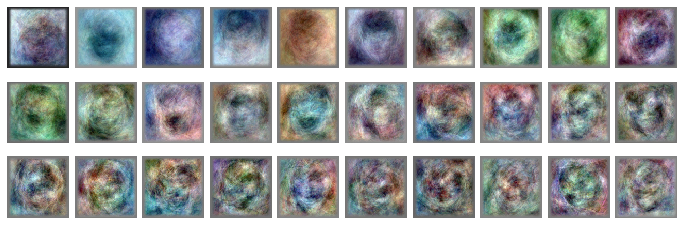

In [ ]:
"""
將前 30 個英雄頭像圖片的主成分 rescale 並繪出
"""
# 為了方便視覺解讀 rescale 主成分
from sklearn.preprocessing import minmax_scale
scaled_comps = minmax_scale(pca.components_, axis=1)

# 繪製前 30 個主成分
fig, axes = plt.subplots(3, 10, figsize=(12, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    c = scaled_comps[i]
    ax.imshow(c.reshape(120, 120, 3))

<br/>

你可以看到這裡的每個主成分都捕捉到了某種形式的頭像資訊。這也是你隨機選擇 30 個像素無法做到的事情。你也可以看到第一主成分包含了所有英雄頭像皆有的黑色邊框；而我個人覺得第一排從左數來第二與第六主成分都相當貼近英雄頭像，你覺得呢？

我們也可以將新得到的 108 維主成分表徵重新投影回原來 43200 維的像素空間看看重建成果：

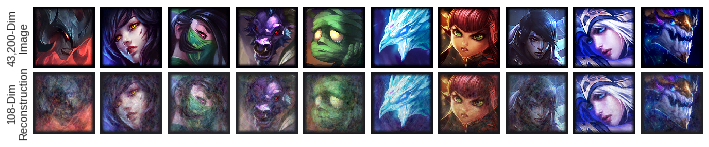

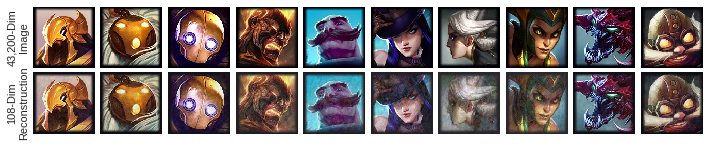

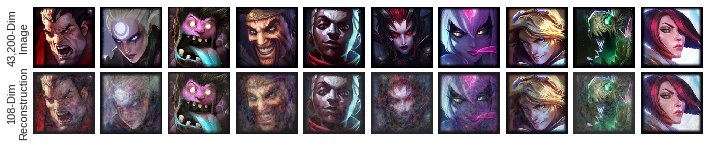

In [ ]:
"""
將新得到的 108 維成分表徵重新投影回原高維空間並比較前後結果
"""
reconstructed_images = pca.inverse_transform(transformed_images)
reconstructed_images = minmax_scale(reconstructed_images, axis=1)

shape = (120, 120, 3)

for i in range(3):
    fig, ax = plt.subplots(2, 10, figsize=(12, 6),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=-0.75, wspace=0.1))
    
    for j in range(10):
        idx = i * 10 + j
        
        ax[0, j].imshow(images[idx].reshape(shape))
        ax[1, j].imshow(reconstructed_images[idx].reshape(shape))

    ax[0, 0].set_ylabel('43,200-Dim\nImage')
    ax[1, 0].set_ylabel('108-Dim\nReconstruction');

<br/>

投影後的結果雖不完美，但也已經相當不錯了。畢竟我們只用了 0.25% 的維度數目來重新表達這些圖片。原圖跟投影後的圖片之間的差距，就是我們之前講過的重建錯誤。在這個例子中為 $RE_{108}$。

好啦，透過英雄聯盟的案例分析，我想你現在也能如法炮製並實際應用 PCA 在你自己感興趣的數據上面啦！我們這趟漫長的 PCA 之旅也即將邁入尾聲。下節讓我簡單總結一下我們一路走來學了些什麼。

## 在萬物皆向量的時代，如何瞭解事物本質？

首先，由衷地感謝你一路跟隨我走到這裡。我得承認，我在本文開頭要求你須先具備的基礎知識並不算少，但如果你有好好聽從我的建議奠定好基礎並一步步跟上來，我相信這趟 PCA 旅程也會讓你收穫滿滿。

閱讀完本文，你現在應該已經能夠：
1. 用 PCA 降維並直觀理解為何將數據投影到主成分上能最小化重建錯誤
2. 用 PCA 去關聯並了解如何進行基底變更以將數據重新表示成主成分表徵
3. 直觀理解共變異數的物理意義並了解如何透過座標轉換使共變異數為零
4. 了解為何數據的共變異數矩陣的 Eigenvectors 為 PCA 找出的主成分
5. 理解為何 $\mathbf{B}_{standard}$ 並非萬能以及如何找出適當的基底 $\mathbf{B}_{pc}$ 重新表述數據
6. 透過 NumPy 以及 scikit-learn 將 PCA 應用在自己想分析的數據之上
7. 直觀理解並能欣賞 PCA 背後的線性代數與統計概念

我希望你也能感受到現在自己的腦袋裡多了不少有用的知識。PCA 的核心精神是為手邊的數據選擇一個最好的觀察視角，給予數據全新且最具意義的表徵（representation）。在這個萬物皆能被以一個數值向量表示並解析的時代，這個核心精神能幫助你解構任何數據，瞭解事物的本質。這也是我撰寫此文希望能讓更多人掌握此精神的動力之一。


!mp4
- dark
- images/pca/tsne.mp4
- t-SNE 也可以用來視覺化高維數據，但需小心解讀


雖然本文篇幅有限無法詳述，在熟悉 PCA 這個線性降維技巧之後，你已經可以開始了解其他（非）線性的降維技術了。比如知名的 [t-SNE](http://distill.pub/2016/misread-tsne/)、[UMAP](https://umap-learn.readthedocs.io/en/latest/how_umap_works.html)、[NMF](https://scikit-learn.org/stable/auto_examples/applications/plot_topics_extraction_with_nmf_lda.html#sphx-glr-auto-examples-applications-plot-topics-extraction-with-nmf-lda-py) 以及 [Autoencoder](https://www.youtube.com/watch?v=PSOt7u8u23w&t=48s)。希望你離去之後能夠實際嘗試應用 PCA 來分析自己或是企業的數據，並將得到的洞見與我分享。另外如果這篇文章有幫助到你，還請不吝花個幾秒鐘分享給對機器學習或是數據分析有興趣的朋友閱讀，幫我將這些知識傳播給更多人。

那就這樣啦！我們下次見。

!quote
- 或許當年發明 PCA 的皮爾森也沒料想到，在一百年後 AI 滿天飛的年代，如此簡單的主成分分析仍然佔有它自己的一席之地。